In [1]:
#if (!requireNamespace("BiocManager", quietly = TRUE))
#    install.packages("BiocManager", repos='http://cran.us.r-project.org')
#BiocManager::install("edgeR")

In [2]:
#browseVignettes("edgeR")

In [3]:
#install.packages("locfit", repos='http://cran.us.r-project.org')

In [1]:
options(warn=-1)
library("tidyverse")
library("psych")
library("gridExtra")
library("scales")
library("limma") 
library("edgeR") 

-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.1.1       v purrr   0.3.2  
v tibble  2.1.1       v dplyr   0.8.0.1
v tidyr   0.8.3       v stringr 1.4.0  
v readr   1.3.1       v forcats 0.4.0  
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()

Attaching package: 'psych'

The following objects are masked from 'package:ggplot2':

    %+%, alpha


Attaching package: 'gridExtra'

The following object is masked from 'package:dplyr':

    combine


Attaching package: 'scales'

The following objects are masked from 'package:psych':

    alpha, rescale

The following object is masked from 'package:purrr':

    discard

The following object is masked from 'package:readr':

    col_factor



In [5]:
MQ_tmt <- read_tsv("data_irs2.txt")

Parsed with column specification:
cols(
  Hippo_ND_1 = col_double(),
  Hippo_ND_2 = col_double(),
  Hippo_ND_3 = col_double(),
  Hippo_HF_1 = col_double(),
  Hippo_HF_2 = col_double(),
  Hippo_HF_3 = col_double(),
  Hippo_KO_1 = col_double(),
  Hippo_KO_2 = col_double(),
  Hippo_KO_3 = col_double(),
  Hypo_ND_1 = col_double(),
  Hypo_ND_2 = col_double(),
  Hypo_ND_3 = col_double(),
  Hypo_HF_1 = col_double(),
  Hypo_HF_3 = col_double(),
  Hypo_KO_1 = col_double(),
  Hypo_KO_2 = col_double(),
  Hypo_KO_3 = col_double(),
  `Hippo_Protein IDs` = col_character()
)


In [6]:
#accession <- MQ_tmt$'Hippo_Protein IDs'

In [7]:
accession <- MQ_tmt$'Hippo_Protein IDs'
MQ_tmt = within(MQ_tmt, rm('Hippo_Protein IDs'))

In [8]:
head(MQ_tmt)
nrow(MQ_tmt)

Hippo_ND_1,Hippo_ND_2,Hippo_ND_3,Hippo_HF_1,Hippo_HF_2,Hippo_HF_3,Hippo_KO_1,Hippo_KO_2,Hippo_KO_3,Hypo_ND_1,Hypo_ND_2,Hypo_ND_3,Hypo_HF_1,Hypo_HF_3,Hypo_KO_1,Hypo_KO_2,Hypo_KO_3
22750.45,26826.07,27175.53,23638.32,25388.47,25270.65,24983.50,24067.96,25749.96,28134.81,29125.72,27617.22,25717.15,28511.78,27681.45,29535.4,29527.39
820871.73,862600.38,825348.37,762234.91,822638.44,825462.06,762284.17,892281.14,840007.25,926920.21,950958.75,887533.35,817594.22,884568.88,996480.67,985004.6,964667.75
597881.40,629796.22,594796.44,517994.49,591981.63,569467.53,497561.95,634255.40,576870.05,625155.76,676883.79,623802.19,568169.57,632391.74,689009.64,718933.8,676258.59
593486.59,623309.66,567009.74,521174.59,555257.40,547862.25,477893.67,631379.28,571407.62,629524.46,664549.35,598720.73,584439.99,628719.32,656330.83,676337.0,650159.14
160049.85,159397.74,177661.57,188159.78,167514.04,174021.64,199762.77,175094.37,188825.64,192434.63,195028.03,193391.25,208427.84,198264.58,200460.46,201276.4,201204.21
46734.39,49034.52,48903.42,44631.81,50103.29,50155.00,43770.85,49203.89,56108.72,53569.27,54385.24,57257.14,49361.82,53408.56,60530.70,57093.6,53039.55


[1] 5570

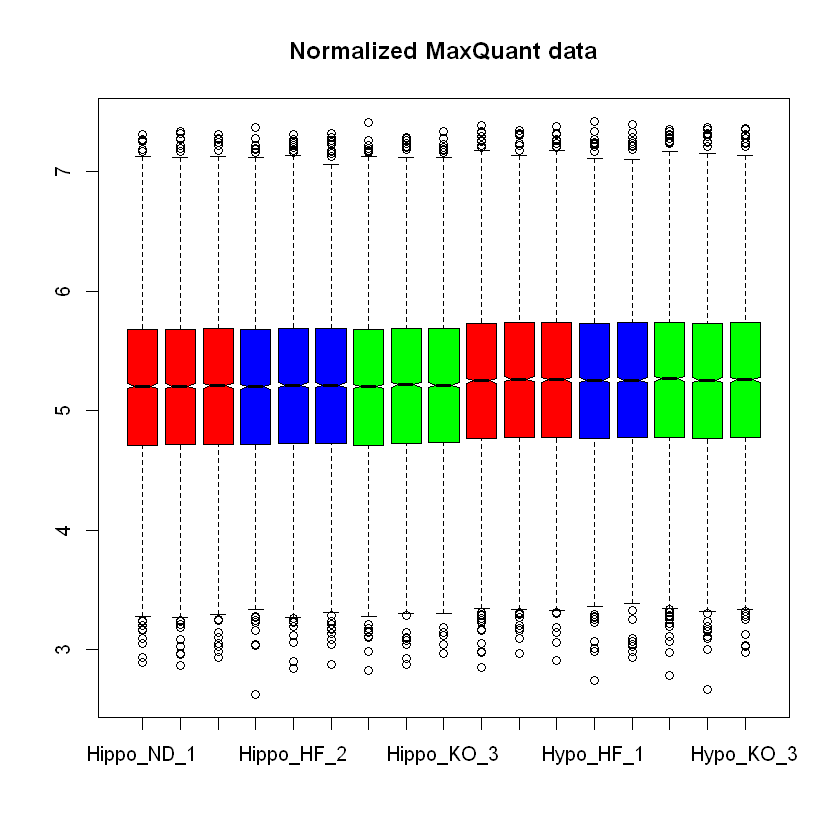

In [9]:
color = c(rep("red", 3), rep("blue", 3), rep("green", 3),rep("red", 3), rep("blue", 2), rep("green", 3) )
boxplot(log10(MQ_tmt), col = color, notch = TRUE, main = "Normalized MaxQuant data")

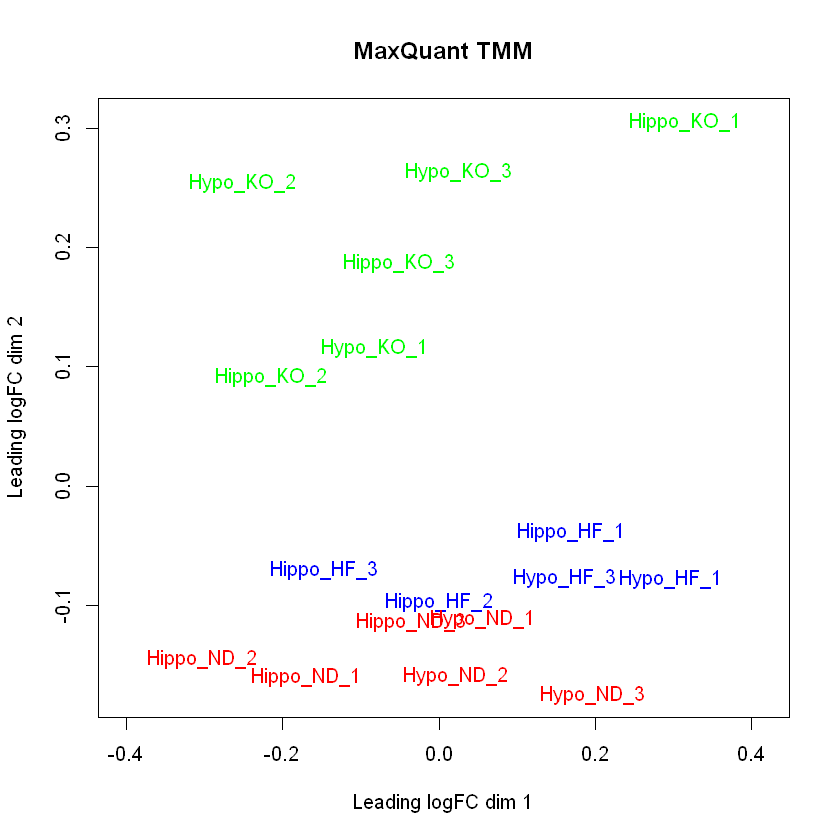

In [10]:
plotMDS(log2(MQ_tmt), col = color, main = "MaxQuant TMM")

In [12]:
group <- c(rep("ND1", 3), rep("HF1", 3), rep("KO1", 3),rep("ND2", 3), rep("HF2", 2), rep("KO2", 3))
y <- DGEList(counts = MQ_tmt, group = group, genes = accession)


In [13]:
y$samples

,group,lib.size,norm.factors
Hippo_ND_1,ND1,2714247380,1
Hippo_ND_2,ND1,2708991383,1
Hippo_ND_3,ND1,2720484761,1
Hippo_HF_1,HF1,2722730745,1
Hippo_HF_2,HF1,2717158612,1
Hippo_HF_3,HF1,2725007255,1
Hippo_KO_1,KO1,2726118329,1
Hippo_KO_2,KO1,2720202024,1
Hippo_KO_3,KO1,2723509259,1
Hypo_ND_1,ND2,3064845775,1


In [14]:
y <- calcNormFactors(y)

In [15]:
y$samples

,group,lib.size,norm.factors
Hippo_ND_1,ND1,2714247380,0.9968385
Hippo_ND_2,ND1,2708991383,1.0017590
Hippo_ND_3,ND1,2720484761,1.0071196
Hippo_HF_1,HF1,2722730745,0.9851085
Hippo_HF_2,HF1,2717158612,1.0070707
Hippo_HF_3,HF1,2725007255,1.0128040
Hippo_KO_1,KO1,2726118329,0.9617621
Hippo_KO_2,KO1,2720202024,1.0128228
Hippo_KO_3,KO1,2723509259,1.0120002
Hypo_ND_1,ND2,3064845775,0.9860005


In [16]:
#design

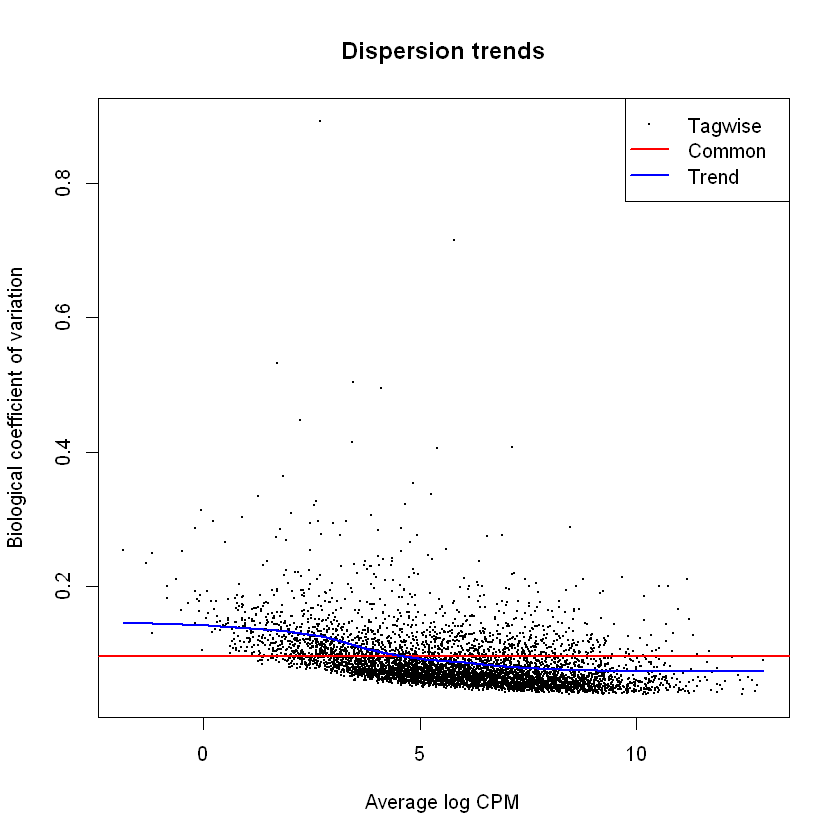

In [17]:
design <- model.matrix(~group)
y <- estimateDisp(y,design)
plotBCV(y, main = "Dispersion trends")

## compute DGE in edgeR

In [6]:
collect_results <- function(df, tt, x, xlab, y, ylab) {
    # Computes new columns and extracts some columns to make results frame
        # df - data in data.frame
        # tt - top tags from edgeR test
        # x - columns for first condition
        # xlab - label for x
        # y - columns for second condition
        # ylab - label for y
        # returns a new dataframe
    
    # condition average vectors
    ave_x <- rowMeans(df[x])
    ave_y <- rowMeans(df[y])
    
    # FC, direction, candidates
    fc <- ifelse(ave_y > ave_x, (ave_y / ave_x), (-1 * ave_x / ave_y))
    direction <- ifelse(ave_y > ave_x, "up", "down")
    candidate <- cut(tt$FDR, breaks = c(-Inf, 0.01, 0.05, 0.10, 1.0), 
                     labels = c("high", "med", "low", "no"))

    # make data frame
    temp <- cbind(df[c(x, y)], data.frame(logFC = tt$logFC, FC = fc, 
                                          PValue = tt$PValue, FDR = tt$FDR, 
                                          ave_x = ave_x, ave_y = ave_y, 
                                          direction = direction, candidate = candidate, 
                                          Acc = tt$genes)) 
    
    # fix column headers for averages
    names(temp)[names(temp) %in% c("ave_x", "ave_y")]  <- str_c("ave_", c(xlab, ylab))    
    
    temp # return the data frame
}

pvalue_plots <- function(results, ylim, title) {
    # Makes p-value distribution plots
        # results - results data frame
        # ylim - ymax for expanded view
        # title - plot title
    p_plot <- ggplot(results, aes(PValue)) + 
        geom_histogram(bins = 100, fill = "white", color = "black") +
        geom_hline(yintercept = mean(hist(results$PValue, breaks = 100, 
                                     plot = FALSE)$counts[26:100]))

    # we will need an expanded plot
    p1 <- p_plot + ggtitle(str_c(title, " p-value distribution"))
    p2 <- p_plot + coord_cartesian(xlim = c(0, 1.0), ylim = c(0, ylim)) + 
        ggtitle("p-values expanded")
    grid.arrange(p1, p2, nrow = 2) # from gridExtra package
}


log2FC_plots <- function(results, range, title) {
    # Makes faceted log2FC plots by candidate
        # results - results data frame
        # range - plus/minus log2 x-axis limits
        # title - plot title
    ggplot(results, aes(x = logFC, fill = candidate)) +
        geom_histogram(binwidth=0.1, color = "black") +
        facet_wrap(~candidate) +
        ggtitle(title) + 
        coord_cartesian(xlim = c(-range, range))
}

transform <- function(results, x, y) {
    # Make data frame with some transformed columns
        # results - results data frame
        # x - columns for x condition
        # y - columns for y condition
        # return new data frame
    df <- data.frame(log10((results[x] + results[y])/2), 
                     log2(results[y] / results[x]), 
                     results$candidate,
                     -log10(results$FDR))
    colnames(df) <- c("A", "M", "candidate", "P")
    
    df # return the data frame
}

MA_plots <- function(results, x, y, title, make_facet = TRUE) {
    # makes MA-plot DE candidate ggplots
        # results - data frame with edgeR results and some condition average columns
        # x - string for x-axis column
        # y - string for y-axis column
        # title - title string to use in plots
        # make_facet - flag to plot facet views
        # returns a list of plots 
    
    # uses transformed data
    temp <- transform(results, x, y)
    
    # 2-fold change lines
    ma_lines <- list(geom_hline(yintercept = 0.0, color = "black"),
                     geom_hline(yintercept = 1.0, color = "black", linetype = "dotted"),
                     geom_hline(yintercept = -1.0, color = "black", linetype = "dotted"))

    # make main MA plot
    ma <- ggplot(temp, aes(x = A, y = M)) +
        geom_point(aes(color = candidate, shape = candidate)) +
        scale_y_continuous(paste0("logFC (", y, "/", x, ")")) +
        scale_x_continuous("Ave_intensity") +
        ggtitle(title) + 
        ma_lines
    
    # make separate MA plots
    if (make_facet == TRUE) {
        ma_facet <- ggplot(temp, aes(x = A, y = M)) +
            geom_point(aes(color = candidate, shape = candidate)) +
            scale_y_continuous(paste0("log2 FC (", y, "/", x, ")")) +
            scale_x_continuous("log10 Ave_intensity") +
            ma_lines +
            facet_wrap(~ candidate) +
            ggtitle(str_c(title, " (separated)"))
    }

    # make the plots visible
    print(ma)
    if (make_facet == TRUE) {
         print(ma_facet)
    }
} 

scatter_plots <- function(results, x, y, title, make_facet = TRUE) {
    # makes scatter-plot DE candidate ggplots
        # results - data frame with edgeR results and some condition average columns
        # x - string for x-axis column
        # y - string for y-axis column
        # title - title string to use in plots
        # make_facet - flag to plot facet views
        # returns a list of plots
    
    # 2-fold change lines
    scatter_lines <- list(geom_abline(intercept = 0.0, slope = 1.0, color = "black"),
                          geom_abline(intercept = 0.301, slope = 1.0, color = "black", linetype = "dotted"),
                          geom_abline(intercept = -0.301, slope = 1.0, color = "black", linetype = "dotted"),
                          scale_y_log10(),
                          scale_x_log10())

    # make main scatter plot
    scatter <- ggplot(results, aes_string(x, y)) +
        geom_point(aes(color = candidate, shape = candidate)) +
        ggtitle(title) + 
        scatter_lines

    # make separate scatter plots
    if (make_facet == TRUE) {
        scatter_facet <- ggplot(results, aes_string(x, y)) +
            geom_point(aes(color = candidate, shape = candidate)) +
            scatter_lines +
            facet_wrap(~ candidate) +
            ggtitle(str_c(title, " (separated)")) 
    }

    # make the plots visible
    print(scatter)
    if (make_facet == TRUE) {
         print(scatter_facet)
    }
}

volcano_plot <- function(results, x, y, title, ymax) {
    # makes a volcano plot
        # results - a data frame with edgeR results
        # x - string for the x-axis column
        # y - string for y-axis column
        # title - plot title string
        # ymax - upper limit for y-axis
    
    # uses transformed data
    temp <- transform(results, x, y)
    
    # build the plot
    ggplot(temp, aes(x = M, y = P)) +
        geom_point(aes(color = candidate, shape = candidate)) +
        xlab("log2 FC") +
        ylab("-log10 FDR") +
        coord_cartesian(xlim = c(-5, 5), ylim = c(0, ymax)) + 
        ggtitle(str_c(title, " Volcano Plot"))
}

In [19]:
#??exactTest

## analysis of pvalues beetween conditions
group <- c(rep("ND1", 3), rep("HF1", 3), rep("KO1", 3),rep("ND2", 3), rep("HF2", 2), rep("KO2", 3))


       KO2-HF2
Down        99
NotSig    5392
Up          79

,genes,logFC,logCPM,PValue,FDR
4975,E41L1_MOUSE,2.7239125,6.2055245,1.361126e-138,7.581473e-135
970,BACE1_MOUSE,-1.1055651,4.6310521,1.570628e-43,4.374199e-40
458,SPA3K_MOUSE,1.7146384,5.5033622,2.706755e-19,5.025542e-16
2729,F177A_MOUSE,-1.0773127,6.3398707,1.161558e-16,1.617469e-13
5223,D3YXM0_MOUSE,2.8484668,3.4919550,2.922913e-16,3.256125e-13
5540,Q91XW9_MOUSE,0.9806695,2.5117654,4.542302e-13,4.216770e-10
1226,NCHL1_MOUSE,0.5298161,8.3597093,5.916511e-12,4.707853e-09
1340,APBA2_MOUSE,0.6455293,5.1553550,5.738281e-11,3.995278e-08
4442,DTD1_MOUSE,-0.6452509,7.4603369,1.380392e-10,8.543093e-08
5104,A0A1W2P879_MOUSE,-0.8133706,0.9592586,1.770448e-09,9.861398e-07


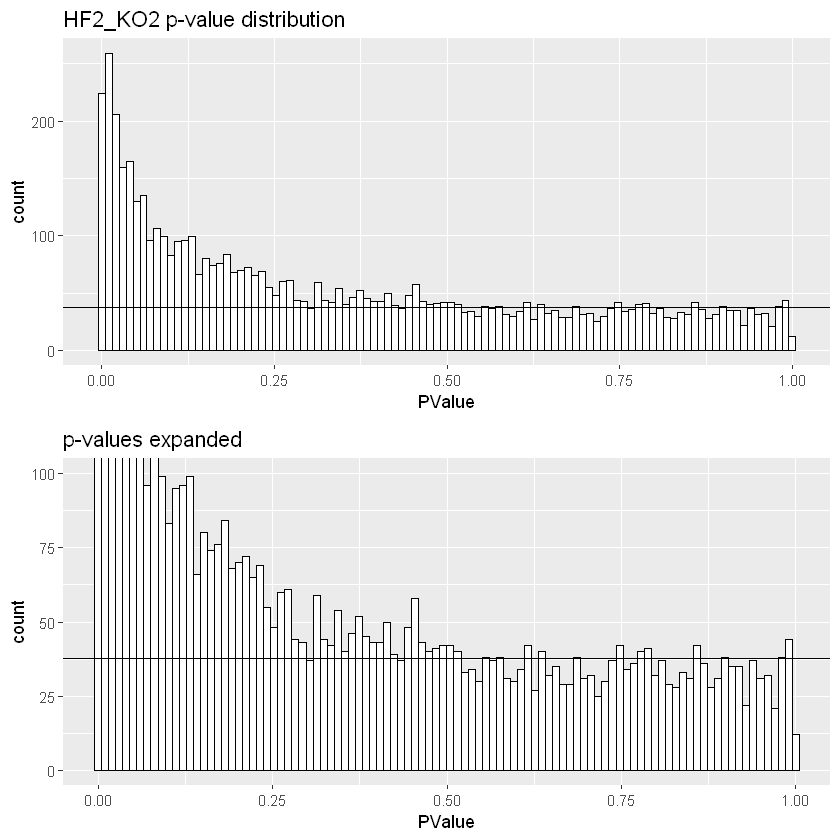

In [21]:
# compute the exact test models, p-values, FC, etc.
et <- exactTest(y, pair = c("HF2", "KO2"))
# make the results table 
M <- 13:14
E <- 15:17
tt <- topTags(et, n = Inf, sort.by = "none")$table
HF2_KO2 <- collect_results(MQ_tmt, tt, M, "HF2", E, "KO2")
# check the p-value distrubution
pvalue_plots(HF2_KO2, 100, "HF2_KO2")
# see how many up and down candidates (10% FDR)
summary(decideTests(et, p.value = 0.10))
# see which proteins have the smallest p-values
topTags(et)$table

       KO2-ND2
Down        63
NotSig    5457
Up          50

,genes,logFC,logCPM,PValue,FDR
4975,E41L1_MOUSE,2.8866855,6.205524,5.299108e-211,2.951603e-207
970,BACE1_MOUSE,-1.0101071,4.631052,2.524290e-43,7.030147e-40
458,SPA3K_MOUSE,1.8256972,5.503362,2.289096e-28,4.250088e-25
5223,D3YXM0_MOUSE,3.2183416,3.491955,8.025734e-27,1.117584e-23
1226,NCHL1_MOUSE,0.6127654,8.359709,2.216905e-19,2.469632e-16
2729,F177A_MOUSE,-1.0327712,6.339871,4.466923e-18,4.146793e-15
873,Q3TJI8_MOUSE,-1.2089357,4.544325,5.245540e-14,4.173951e-11
1340,APBA2_MOUSE,0.6482723,5.155355,8.210040e-14,5.716240e-11
5011,Q6TA13_MOUSE,0.4918188,8.722706,1.188109e-11,7.353075e-09
2431,THNS2_MOUSE,-0.7422025,5.037274,2.579092e-11,1.436554e-08


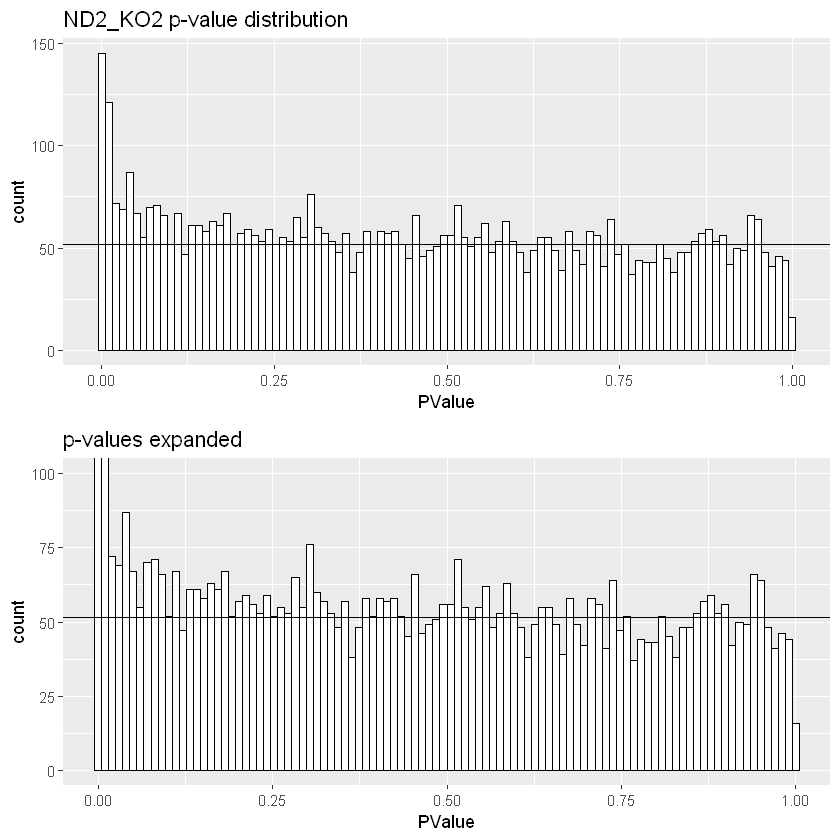

In [23]:
# compute the exact test models, p-values, FC, etc.
et <- exactTest(y, pair = c("ND2", "KO2"))
# make the results table 
M <- 10:12
E <- 15:17
tt <- topTags(et, n = Inf, sort.by = "none")$table
ND2_KO2 <- collect_results(MQ_tmt, tt, M, "ND2", E, "KO2")
# check the p-value distrubution
pvalue_plots(ND2_KO2, 100, "ND2_KO2")
# see how many up and down candidates (10% FDR)
summary(decideTests(et, p.value = 0.10))
# see which proteins have the smallest p-values
topTags(et)$table

       KO1-HF1
Down         9
NotSig    5552
Up           9

,genes,logFC,logCPM,PValue,FDR
4975,E41L1_MOUSE,2.6553051,6.13228074,7.849783e-153,4.372329e-149
970,BACE1_MOUSE,-0.9336759,4.63082464,1.562767e-23,4.352307e-20
458,SPA3K_MOUSE,2.0007149,5.48169493,3.143817e-19,5.837021e-16
5223,D3YXM0_MOUSE,1.9815526,3.43478960,4.452598e-10,6.200243e-07
5153,A2AF31_MOUSE,1.9274105,5.13172728,3.826652e-09,4.262890e-06
607,A2A6J4_MOUSE,-1.2447108,-0.05900135,8.883448e-08,8.246801e-05
5024,A0A0A6YY53_MOUSE,-0.8073103,5.87336199,2.888233e-07,2.298208e-04
662,GBRA2_MOUSE,-0.6549961,3.98039620,2.920101e-06,2.033121e-03
529,7B2_MOUSE,0.9728970,6.46190964,4.067203e-06,2.517147e-03
2431,THNS2_MOUSE,-0.5637043,5.03076550,4.634885e-06,2.581631e-03


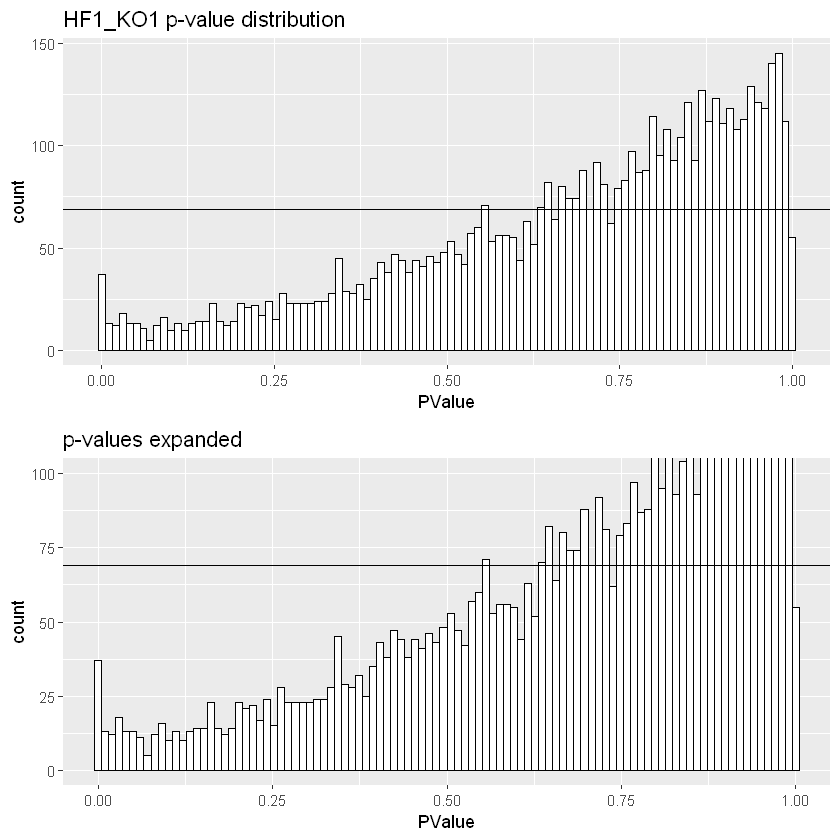

In [58]:
# compute the exact test models, p-values, FC, etc.
et <- exactTest(y, pair = c("HF1", "KO1"))
# make the results table 
M <- 4:6
E <- 7:9
tt <- topTags(et, n = Inf, sort.by = "none")$table
HF1_KO1 <- collect_results(MQ_tmt_tmm, tt, M, "HF1", E, "KO1")
# check the p-value distrubution
pvalue_plots(HF1_KO1, 100, "HF1_KO1")
# see how many up and down candidates (10% FDR)
summary(decideTests(et, p.value = 0.10))
# see which proteins have the smallest p-values
topTags(et)$table

       KO1-ND1
Down        16
NotSig    5525
Up          29

,genes,logFC,logCPM,PValue,FDR
4975,E41L1_MOUSE,2.8861176,6.132281,8.371598e-177,4.662980e-173
458,SPA3K_MOUSE,2.1896387,5.481695,1.936151e-22,5.392181e-19
970,BACE1_MOUSE,-0.8072994,4.630825,4.631353e-18,8.598879e-15
5223,D3YXM0_MOUSE,2.1719662,3.434790,1.110650e-11,1.546580e-08
5153,A2AF31_MOUSE,1.8931931,5.131727,6.895963e-09,7.682103e-06
1226,NCHL1_MOUSE,0.4469170,8.329833,1.232110e-08,1.143809e-05
529,7B2_MOUSE,1.1056751,6.461910,1.760338e-07,1.400726e-04
2431,THNS2_MOUSE,-0.5928849,5.030766,1.463028e-06,1.000854e-03
1488,NLRX1_MOUSE,-0.5182931,5.933337,1.617179e-06,1.000854e-03
2950,CNST_MOUSE,0.6752269,3.620956,2.124596e-06,1.183400e-03


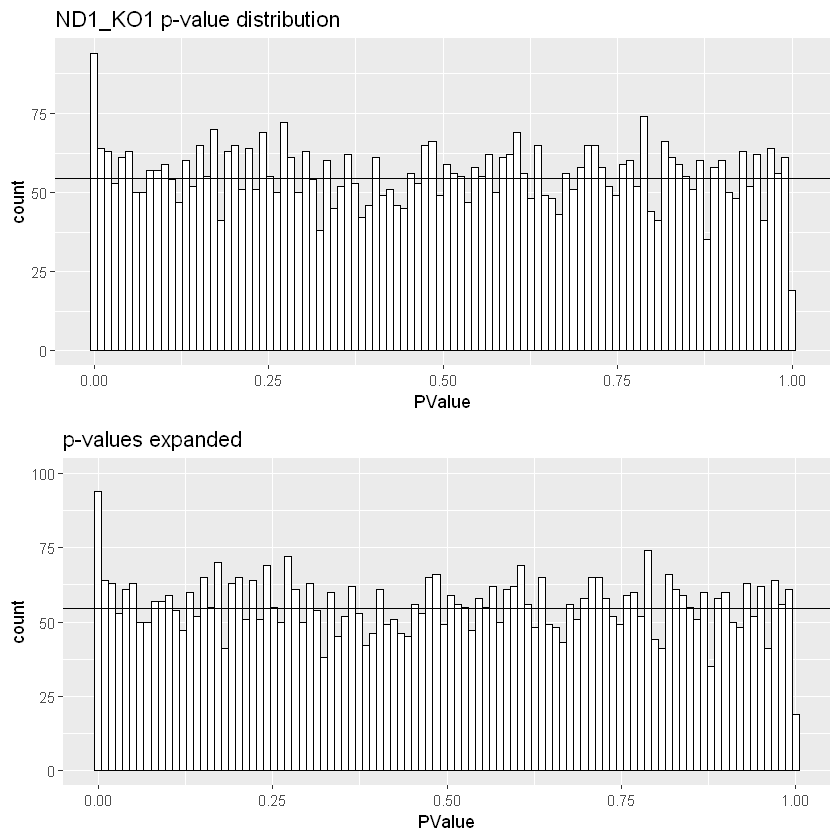

In [57]:
# compute the exact test models, p-values, FC, etc.
et <- exactTest(y, pair = c("ND1", "KO1"))
# make the results table 
M <- 1:3
E <- 7:9
tt <- topTags(et, n = Inf, sort.by = "none")$table
ND1_KO1 <- collect_results(MQ_tmt_tmm, tt, M, "ND1", E, "KO1")
# check the p-value distrubution
pvalue_plots(ND1_KO1, 100, "ND1_KO1")
# see how many up and down candidates (10% FDR)
summary(decideTests(et, p.value = 0.10))
# see which proteins have the smallest p-values
topTags(et)$table

       KO2-KO1
Down         0
NotSig    5570
Up           0

,genes,logFC,logCPM,PValue,FDR
4815,AKA12_MOUSE,-0.4285652,8.494302,0.001127367,0.9980477
153,AKAP1_MOUSE,-0.5297874,4.573237,0.002036403,0.9980477
1107,A0A0N4SVK3_MOUSE,-0.4831772,2.653822,0.003530543,0.9980477
957,CDD_MOUSE,-0.3708993,3.017807,0.004028625,0.9980477
2668,UBP54_MOUSE,0.3225023,2.413856,0.004720124,0.9980477
2950,CNST_MOUSE,-0.3882050,3.620956,0.006251878,0.9980477
700,MRP_MOUSE,-0.6576914,6.312472,0.007653872,0.9980477
735,RANG_MOUSE,-0.4415134,6.939150,0.008054688,0.9980477
971,MCH_MOUSE,-0.5002454,5.374352,0.009594279,0.9980477
696,CELF1_MOUSE,0.2678073,6.274198,0.010533275,0.9980477


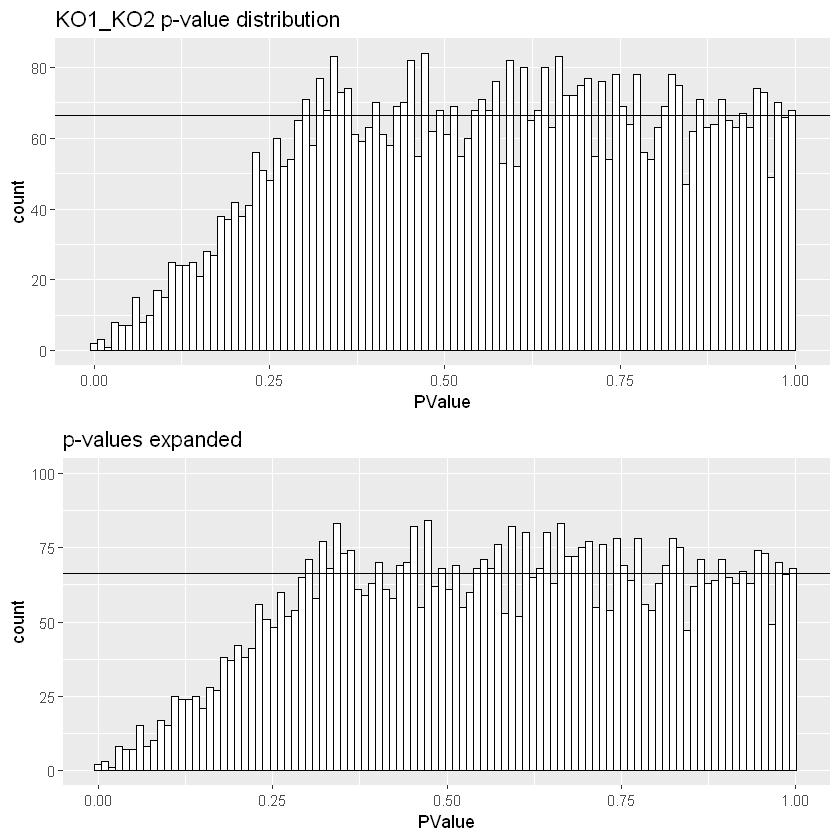

In [54]:
# compute the exact test models, p-values, FC, etc.
et <- exactTest(y, pair = c("KO1", "KO2"))
# make the results table 
M <- 7:9
E <- 16:18
tt <- topTags(et, n = Inf, sort.by = "none")$table
KO1_KO2 <- collect_results(MQ_tmt_tmm, tt, M, "KO1", E, "KO2")
# check the p-value distrubution
pvalue_plots(ND1_ND2, 100, "KO1_KO2")
# see how many up and down candidates (10% FDR)
summary(decideTests(et, p.value = 0.10))
# see which proteins have the smallest p-values
topTags(et)$table

       HF2-HF1
Down         0
NotSig    5570
Up           0

,genes,logFC,logCPM,PValue,FDR
3550,GORS1_MOUSE,0.7036530,-0.07632232,0.0006182929,0.9520297
309,PGAM2_MOUSE,-0.4548734,7.34546913,0.0031897504,0.9520297
982,A2A9P2_MOUSE,-0.4457106,2.19557499,0.0039190938,0.9520297
3499,ITM2C_MOUSE,0.2039422,6.33259351,0.0076898170,0.9520297
4063,PPIL4_MOUSE,-0.3095288,4.63602992,0.0095897456,0.9520297
1253,BID_MOUSE,0.5803066,2.31067482,0.0100517713,0.9520297
1091,UB2G1_MOUSE,-0.4800993,1.81722855,0.0163249496,0.9520297
1612,IQGA2_MOUSE,0.4366746,5.42615301,0.0186273346,0.9520297
5540,Q91XW9_MOUSE,-0.4721163,2.50137423,0.0190781321,0.9520297
880,GBRB1_MOUSE,-0.1849537,6.90282445,0.0204098978,0.9520297


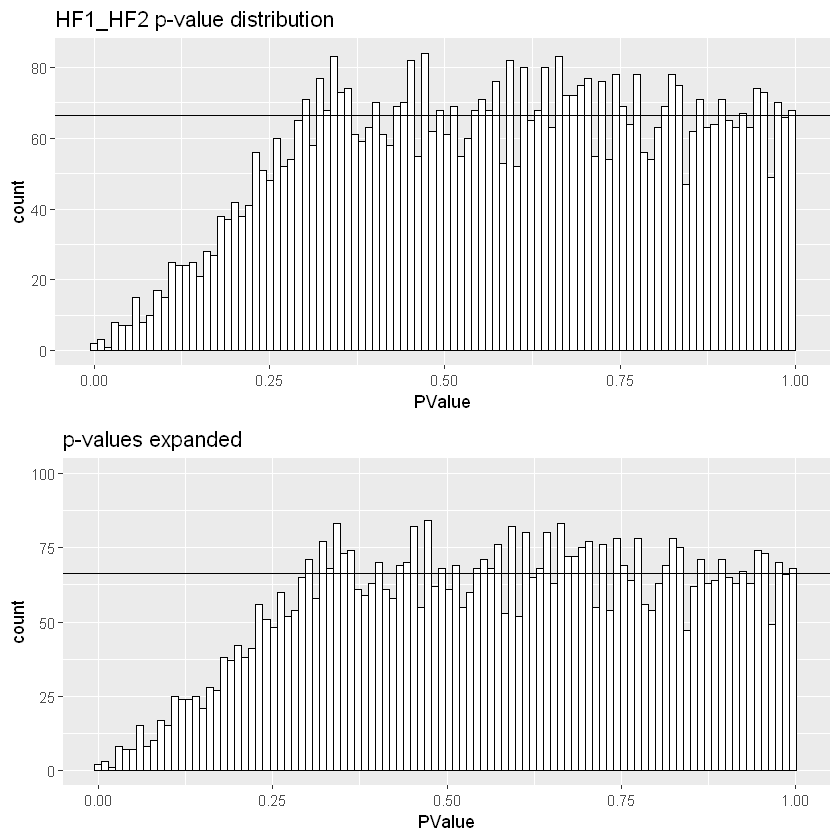

In [55]:
# compute the exact test models, p-values, FC, etc.
et <- exactTest(y, pair = c("HF1", "HF2"))
# make the results table 
M <- 4:6
E <- 13:15
tt <- topTags(et, n = Inf, sort.by = "none")$table
HF1_HF2 <- collect_results(MQ_tmt_tmm, tt, M, "HF1", E, "HF2")
# check the p-value distrubution
pvalue_plots(ND1_ND2, 100, "HF1_HF2")
# see how many up and down candidates (10% FDR)
summary(decideTests(et, p.value = 0.10))
# see which proteins have the smallest p-values
topTags(et)$table

       ND2-ND1
Down         0
NotSig    5570
Up           0

,genes,logFC,logCPM,PValue,FDR
895,FABP7_MOUSE,0.3432433,6.48361303,0.004851156,1
5223,D3YXM0_MOUSE,-0.8664477,3.43478960,0.005024505,1
516,KCC2A_MOUSE,-2.3608555,8.07171396,0.006578760,1
957,CDD_MOUSE,0.3401354,3.01780729,0.008345862,1
1004,RAB2B_MOUSE,-0.2212801,4.82929920,0.013944451,1
1612,IQGA2_MOUSE,-0.4274400,5.42615301,0.021264773,1
4817,CAD13_MOUSE,0.2842244,7.79024400,0.025911271,1
777,TRAF2_MOUSE,-0.5147262,0.07116766,0.028088310,1
3231,IP3KA_MOUSE,-0.2078033,6.78769255,0.028390117,1
421,LAMB1_MOUSE,0.2483079,4.68001623,0.029256603,1


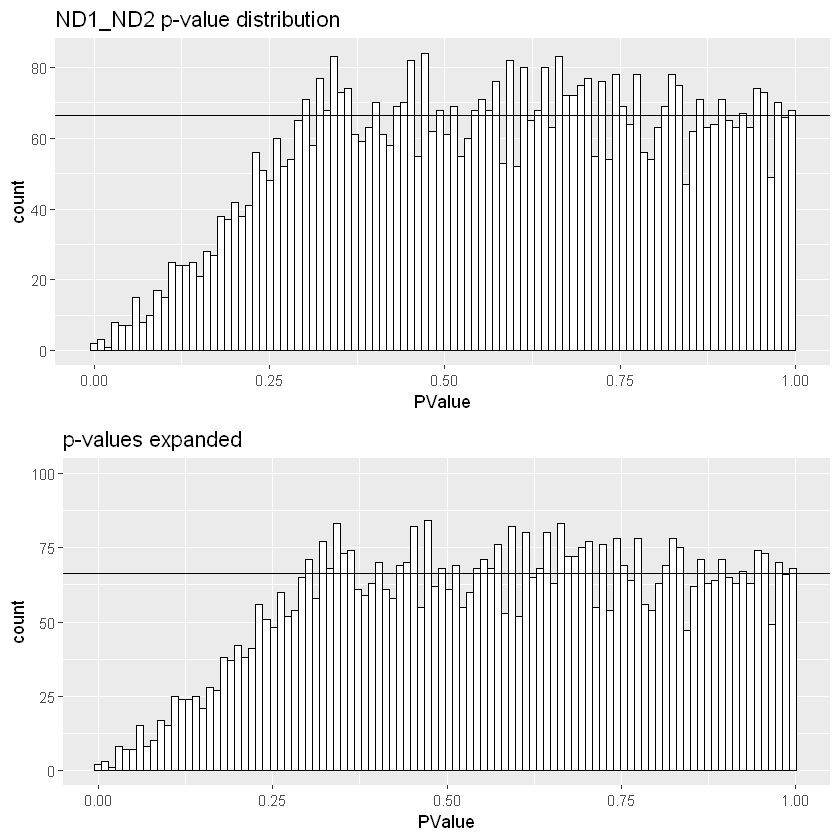

In [56]:
# compute the exact test models, p-values, FC, etc.
et <- exactTest(y, pair = c("ND1", "ND2"))
# make the results table 
M <- 1:3
E <- 10:12
tt <- topTags(et, n = Inf, sort.by = "none")$table
ND1_ND2 <- collect_results(MQ_tmt_tmm, tt, M, "ND1", E, "ND2")
# check the p-value distrubution
pvalue_plots(ND1_ND2, 100, "ND1_ND2")
# see how many up and down candidates (10% FDR)
summary(decideTests(et, p.value = 0.10))
# see which proteins have the smallest p-values
topTags(et)$table

       HF2-ND2
Down         1
NotSig    5566
Up           3

,genes,logFC,logCPM,PValue,FDR
873,Q3TJI8_MOUSE,-1.0551507,4.479516,7.679661e-06,0.04277571
418,HBB1_MOUSE,1.9920940,2.848777,2.346981e-05,0.06536343
516,KCC2A_MOUSE,3.8023785,8.071714,3.821846e-05,0.07095893
662,GBRA2_MOUSE,0.5651929,3.980396,5.358960e-05,0.07462352
349,PLIN4_MOUSE,-1.1683458,2.554163,1.036094e-04,0.10064723
3368,DHC24_MOUSE,-0.4943241,3.640596,1.169674e-04,0.10064723
2600,RB39A_MOUSE,2.4651125,3.253643,1.264866e-04,0.10064723
3499,ITM2C_MOUSE,0.2896455,6.332594,1.544336e-04,0.10752440
1612,IQGA2_MOUSE,0.6880610,5.426153,2.180969e-04,0.12576629
3816,COA5_MOUSE,2.6037738,2.282233,2.325610e-04,0.12576629


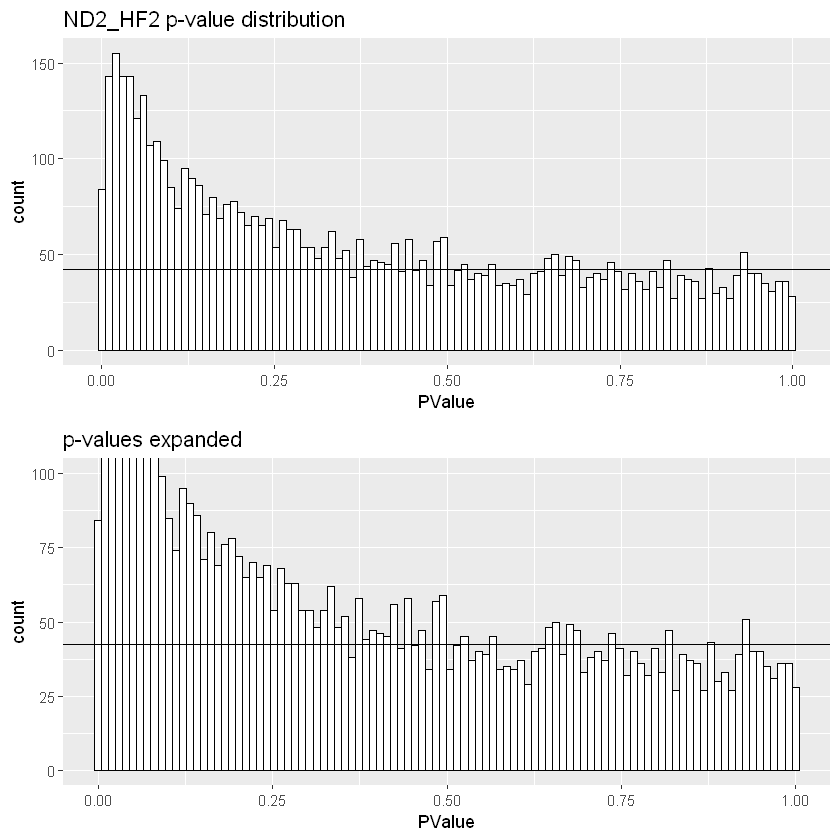

In [49]:
# compute the exact test models, p-values, FC, etc.
et <- exactTest(y, pair = c("ND2", "HF2"))
# make the results table 
M <- 10:12
E <- 13:15
tt <- topTags(et, n = Inf, sort.by = "none")$table
ND2_HF2 <- collect_results(MQ_tmt_tmm, tt, M, "ND2", E, "HF2")
# check the p-value distrubution
pvalue_plots(ND2_HF2, 100, "ND2_HF2")
# see how many up and down candidates (10% FDR)
summary(decideTests(et, p.value = 0.10))
# see which proteins have the smallest p-values
topTags(et)$table

       HF1-ND1
Down         0
NotSig    5569
Up           1

,genes,logFC,logCPM,PValue,FDR
662,GBRA2_MOUSE,0.6732150,3.98039620,1.545352e-06,0.008607609
558,G5E846_MOUSE,-0.5255390,4.51852635,5.715421e-04,0.998075865
1415,CALB2_MOUSE,0.4694950,9.29602328,1.390006e-03,0.998075865
4996,KCJ16_MOUSE,0.5645741,3.70737585,1.592318e-03,0.998075865
4817,CAD13_MOUSE,0.4010713,7.79024400,1.684841e-03,0.998075865
4128,ACSL3_MOUSE,-0.2529986,7.19648343,1.901680e-03,0.998075865
880,GBRB1_MOUSE,0.2467798,6.90282445,1.981815e-03,0.998075865
3264,CMBL_MOUSE,0.2347604,7.35220863,2.189950e-03,0.998075865
3550,GORS1_MOUSE,-0.6242046,-0.07632232,2.368801e-03,0.998075865
2874,GPCP1_MOUSE,-0.2766861,5.07592989,2.405339e-03,0.998075865


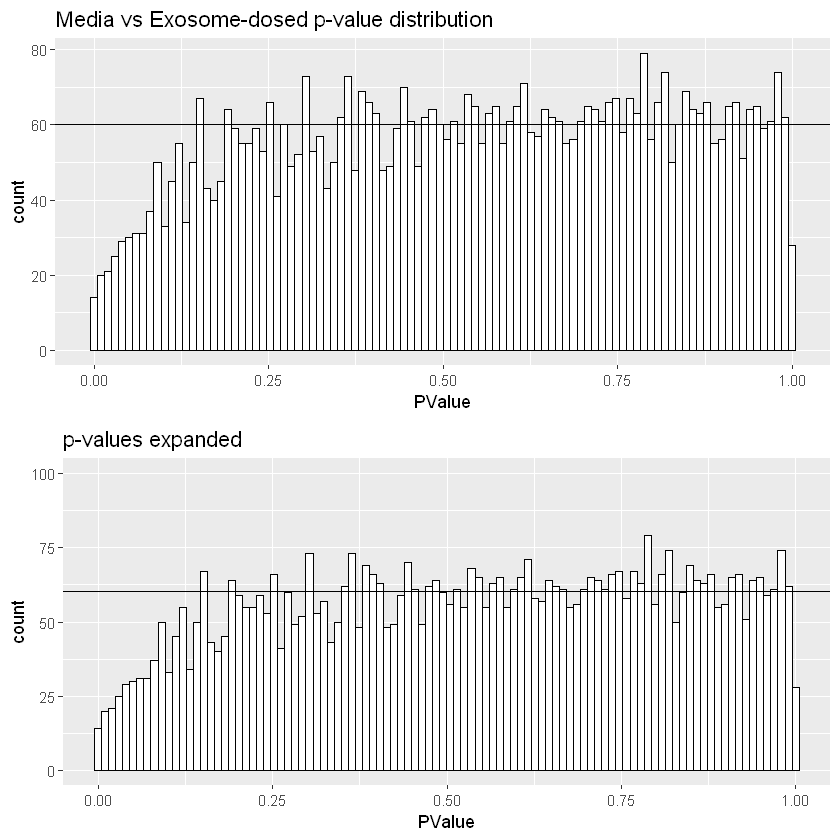

In [50]:
# compute the exact test models, p-values, FC, etc.
et <- exactTest(y, pair = c("ND1", "HF1"))
# make the results table 
M <- 1:3
E <- 4:6
tt <- topTags(et, n = Inf, sort.by = "none")$table
ND1_HF1 <- collect_results(MQ_tmt_tmm, tt, M, "ND1", E, "HF1")
# check the p-value distrubution
pvalue_plots(ND1_HF1, 100, "Media vs Exosome-dosed")
# see how many up and down candidates (10% FDR)
summary(decideTests(et, p.value = 0.10))
# see which proteins have the smallest p-values
topTags(et)$table

candidate,n
high,3
no,7040


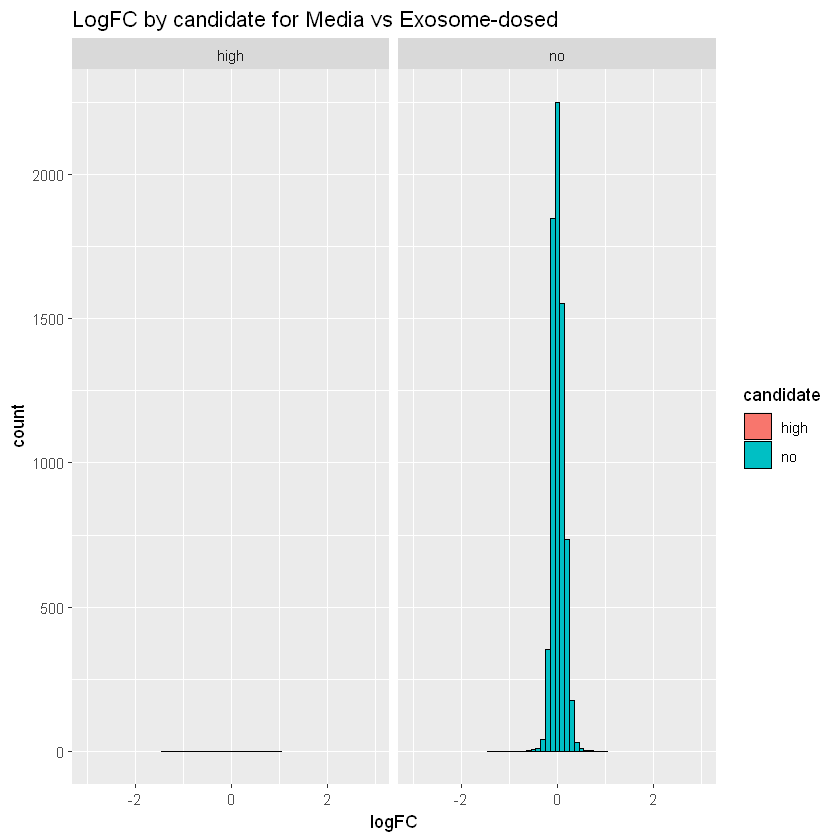

In [55]:
# see how many candidates are in each category
ND_KO %>% count(candidate)

# can look at log2FC distributions as a check
log2FC_plots(ND_KO, 3, "LogFC by candidate for Media vs Exosome-dosed")

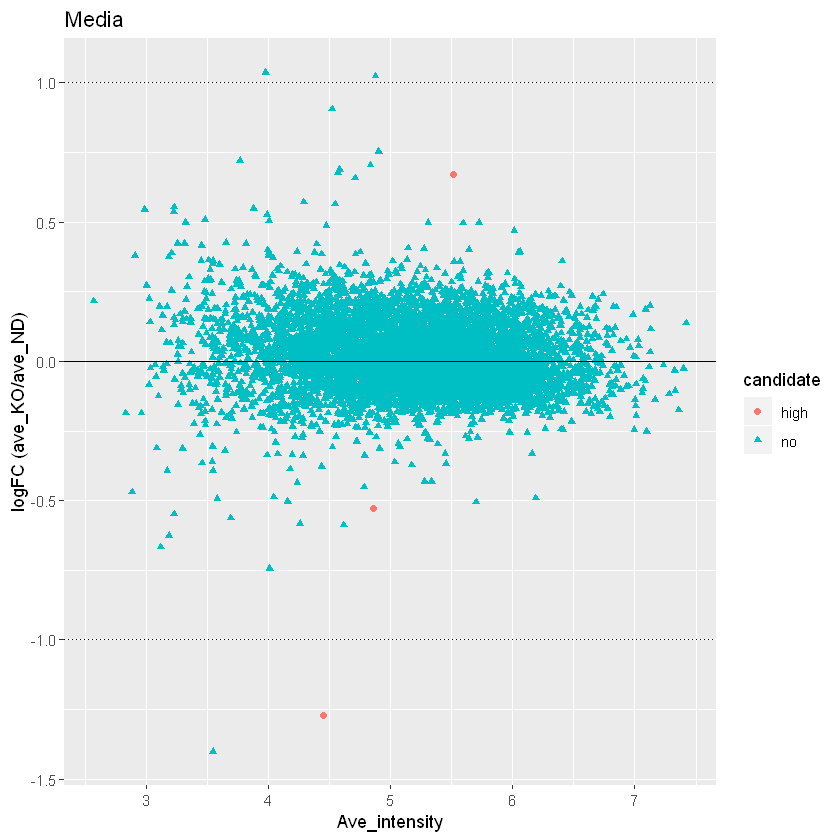

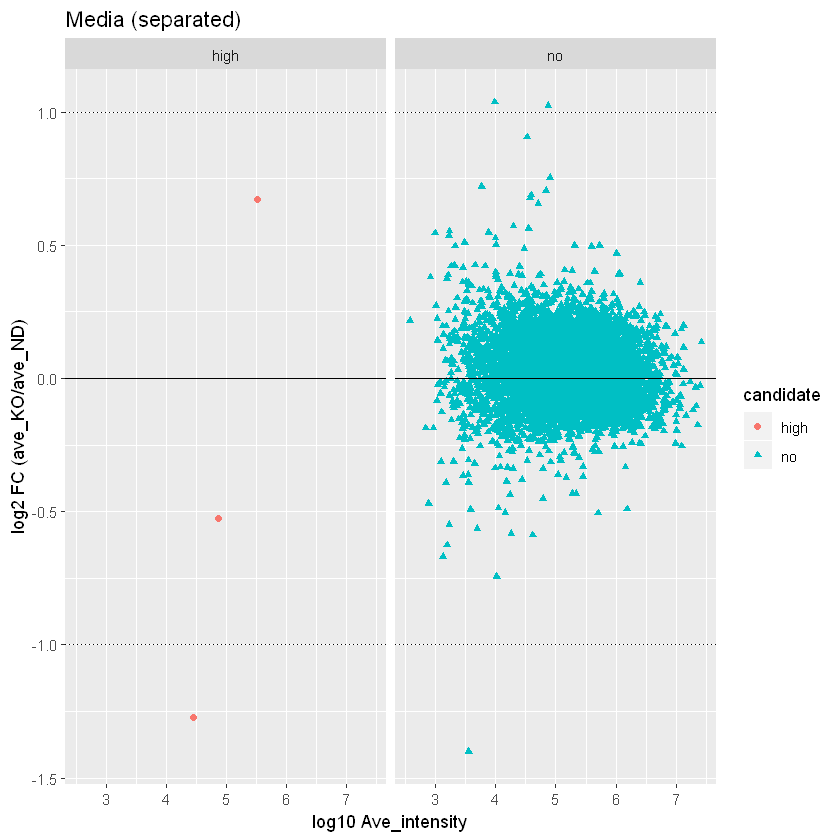

In [56]:
# MA plots of DE candidates
MA_plots(ND_KO, "ave_ND", "ave_KO", "Media")


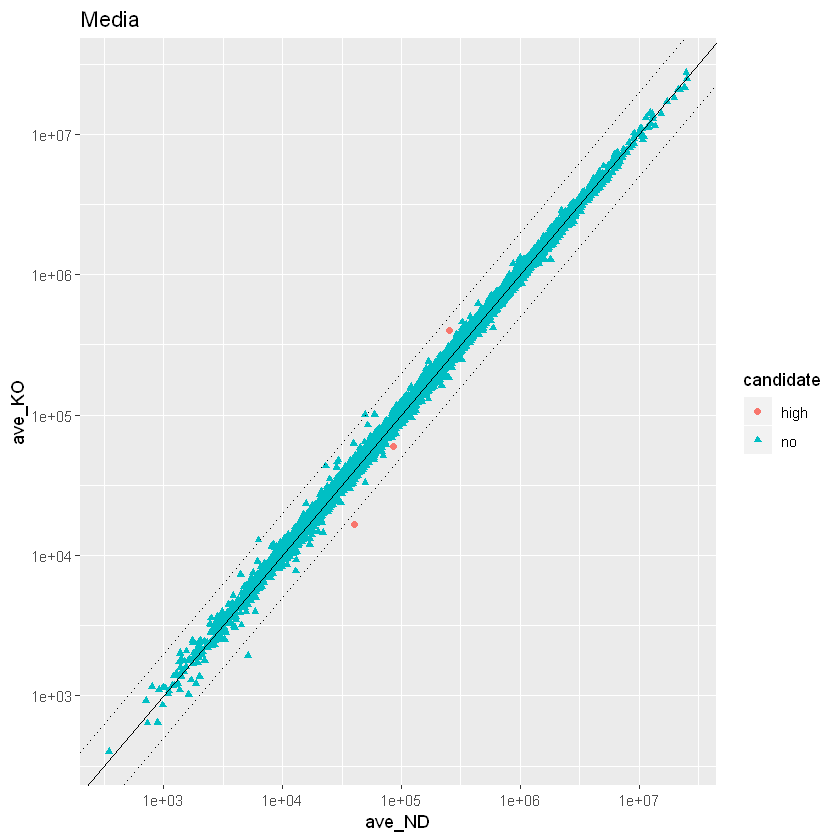

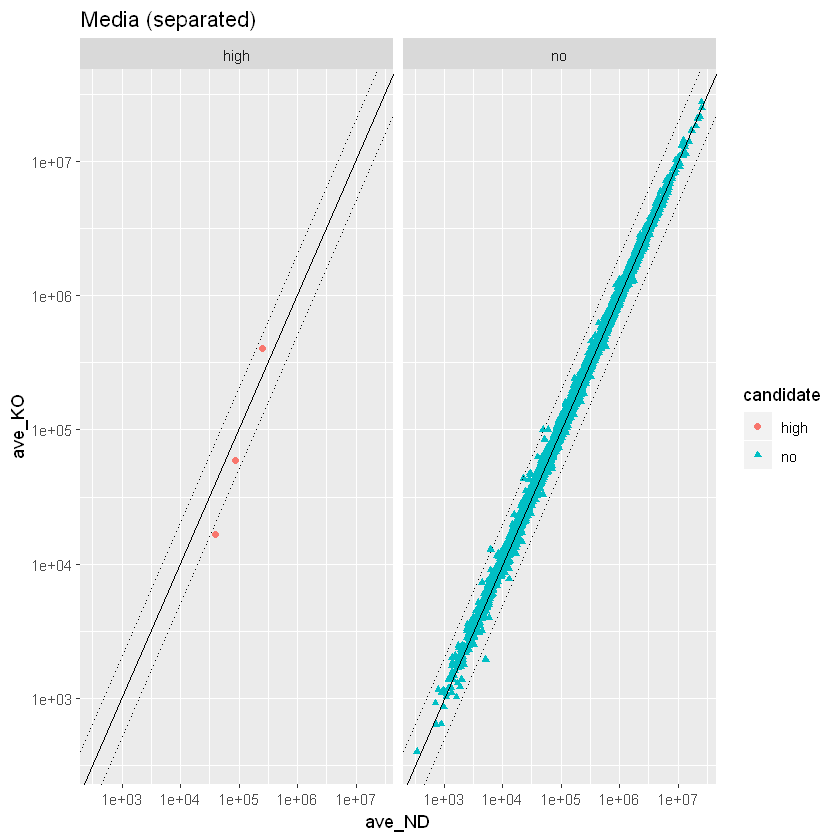

In [57]:
scatter_plots(ND_KO, "ave_ND", "ave_KO", "Media")

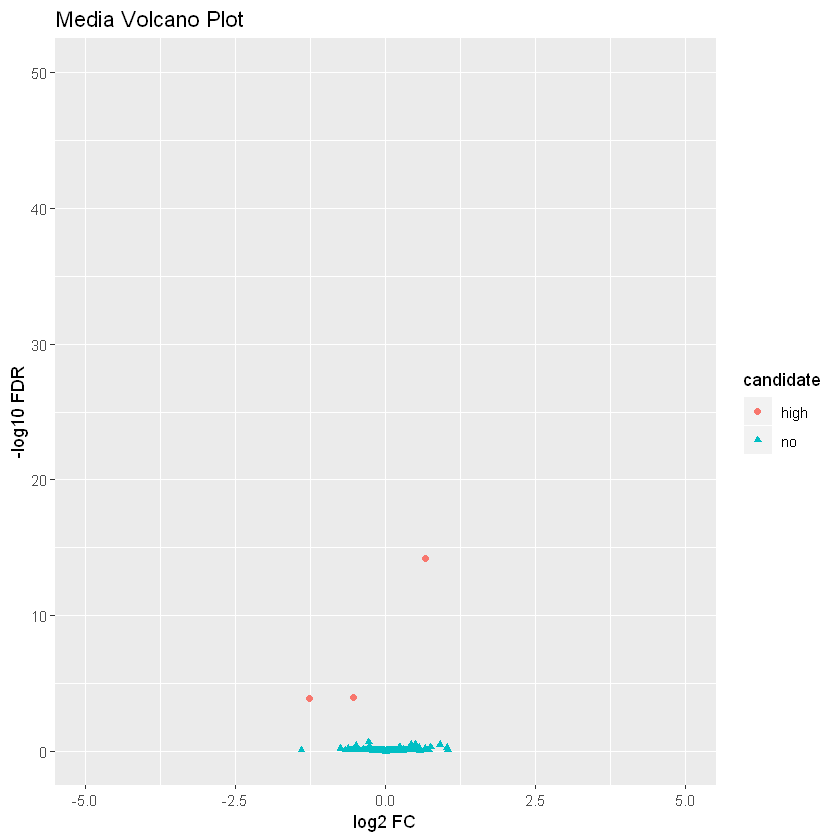

In [58]:
# finally, a volcano plot
volcano_plot(ND_KO, "ave_ND", "ave_KO", "Media", 50)


In [9]:
# function to extract the identifier part of the accesssion
get_identifier <- function(accession) {
    #identifier <- str_split(accession, "\\|", simplify = TRUE)
    #identifier[,3]
    accession
}

set_plot_dimensions <- function(width_choice, height_choice) {
    options(repr.plot.width=width_choice, repr.plot.height=height_choice)
}

plot_top_tags <- function(results, nleft, nright, top_tags) {
    # results should have data first, then test results (two condition summary table)
    # nleft, nright are number of data points in each condition
    # top_tags is number of up and number of down top DE candidates to plot
    # get top ipregulated
    up <- results %>% 
        filter(logFC >= 0) %>%
        arrange(FDR)
    up <- up[1:top_tags, ]
    
    # get top down regulated
    down <- results %>% 
        filter(logFC < 0) %>%
        arrange(FDR)
    down <- down[1:top_tags, ]
    
    # pack them
    proteins <- rbind(up, down)
        
    color = c(rep("red", nleft), rep("blue", nright))
    for (row_num in 1:nrow(proteins)) {
        row <- proteins[row_num, ]
        vec <- as.vector(unlist(row[1:(nleft + nright)]))
        names(vec) <- colnames(row[1:(nleft + nright)])
        title <- str_c(get_identifier(row$Acc), ", int: ", scientific(mean(vec), 2), 
                       ", p-val: ", scientific(row$FDR, digits = 3), 
                       ", FC: ", round(row$FC, digits = 1))
        barplot(vec, col = color, main = title)
    }    
}
# plot the top 20 up and 20 down proteins


In [125]:
data_irs <- read_tsv("data_irs.txt")
accession <- data_irs$'Hippo_Protein IDs'
data_irs = within(data_irs, rm('Hippo_Protein IDs'))

Parsed with column specification:
cols(
  Hippo_ND_1 = col_double(),
  Hippo_ND_2 = col_double(),
  Hippo_ND_3 = col_double(),
  Hippo_HF_1 = col_double(),
  Hippo_HF_2 = col_double(),
  Hippo_HF_3 = col_double(),
  Hippo_KO_1 = col_double(),
  Hippo_KO_2 = col_double(),
  Hippo_KO_3 = col_double(),
  Hypo_ND_1 = col_double(),
  Hypo_ND_2 = col_double(),
  Hypo_ND_3 = col_double(),
  Hypo_HF_1 = col_double(),
  Hypo_HF_2 = col_double(),
  Hypo_HF_3 = col_double(),
  Hypo_KO_1 = col_double(),
  Hypo_KO_2 = col_double(),
  Hypo_KO_3 = col_double(),
  `Hippo_Protein IDs` = col_character()
)


In [126]:
head(data_irs)

Hippo_ND_1,Hippo_ND_2,Hippo_ND_3,Hippo_HF_1,Hippo_HF_2,Hippo_HF_3,Hippo_KO_1,Hippo_KO_2,Hippo_KO_3,Hypo_ND_1,Hypo_ND_2,Hypo_ND_3,Hypo_HF_1,Hypo_HF_2,Hypo_HF_3,Hypo_KO_1,Hypo_KO_2,Hypo_KO_3
23407.61,27600.95,27960.52,24321.13,26121.83,26000.60,25705.17,24763.18,26493.76,27071.91,28025.39,26573.88,24745.59,15056.17,27434.64,26635.68,28419.60,28411.89
854017.19,897430.78,858674.59,793012.71,855855.24,858792.87,793063.96,928310.00,873925.37,882049.85,904924.74,844569.63,778016.11,658238.05,841748.66,948243.03,937322.53,917970.10
613386.66,646129.15,610221.69,531427.99,607333.88,584235.90,510465.55,650703.97,591830.41,603269.06,653186.09,601962.87,548277.95,317553.38,610251.70,664887.41,693763.97,652582.77
624447.57,655826.45,596589.48,548363.20,584224.05,576443.10,502824.41,664317.05,601216.79,592338.05,625293.99,563353.91,549916.75,566068.83,591580.47,617560.95,636385.32,611753.83
167108.75,166427.88,185497.22,196458.46,174902.14,181696.76,208573.18,182816.80,197153.68,182465.77,184924.82,183372.83,197630.47,152540.91,187993.70,190075.83,190849.49,190781.05
47996.91,50359.17,50224.53,45837.52,51456.81,51509.92,44953.31,50533.11,57624.47,51639.40,52425.98,55194.41,47583.53,27652.37,51484.48,58350.04,55036.77,51128.77


In [127]:

group <- c(rep("ND1", 3), rep("HF1", 3), rep("KO1", 3),rep("ND2", 3), rep("HF2", 3), rep("KO2", 3))
y <- DGEList(counts = data_irs, group = group, genes = accession )

#test <- calcNormFactors(y)
#head(test)

In [128]:
irs_tmm <- calcNormFactors(data_irs)
data_irs_tmm <- sweep(data_irs, 2, irs_tmm, FUN = "/") 

In [129]:
head(data_irs_tmm)

Hippo_ND_1,Hippo_ND_2,Hippo_ND_3,Hippo_HF_1,Hippo_HF_2,Hippo_HF_3,Hippo_KO_1,Hippo_KO_2,Hippo_KO_3,Hypo_ND_1,Hypo_ND_2,Hypo_ND_3,Hypo_HF_1,Hypo_HF_2,Hypo_HF_3,Hypo_KO_1,Hypo_KO_2,Hypo_KO_3
23400.43,27458.49,27761.95,24609.57,25862.83,25597.71,26616.25,24428.06,26134.14,26882.96,27242.40,26052.70,24534.69,18163.90,26859.94,25868.34,27728.19,27570.89
853755.19,892798.50,852576.73,802417.66,847369.25,845485.23,821172.99,915747.37,862062.74,875893.33,879642.57,828005.58,771385.17,794104.61,824115.70,920925.47,914518.89,890797.90
613198.48,642794.02,605888.22,537730.60,601312.04,575182.73,528558.29,641898.12,583796.92,599058.37,634937.10,590156.93,543605.04,383099.40,597468.14,645732.93,676885.74,633266.11
624256.00,652441.26,592352.82,554866.67,578431.34,567510.68,520646.31,655326.98,593055.89,588203.65,607824.27,552305.18,545229.87,682910.79,579188.04,599769.88,620903.03,593645.72
167057.48,165568.83,184179.92,198788.41,173167.95,178881.23,215965.76,180342.77,194477.52,181192.20,179758.32,179776.44,195946.09,184026.80,184055.61,184600.01,186206.41,185133.87
47982.18,50099.23,49867.86,46381.14,50946.61,50711.73,46546.61,49849.26,56842.28,51278.97,50961.28,54111.92,47177.98,33360.08,50405.98,56669.05,53697.80,49615.34


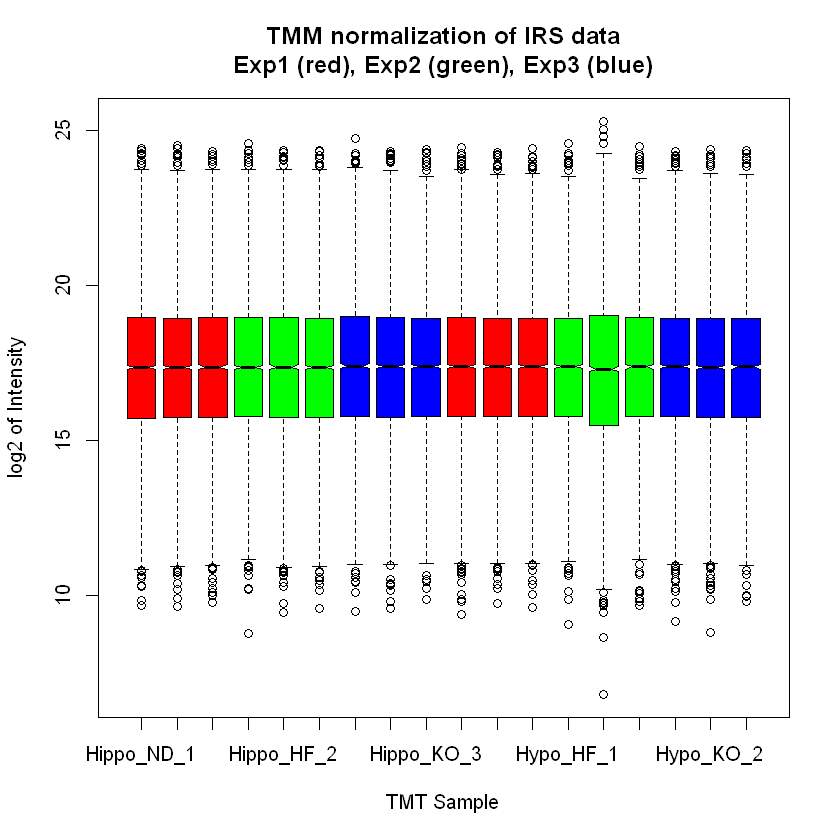

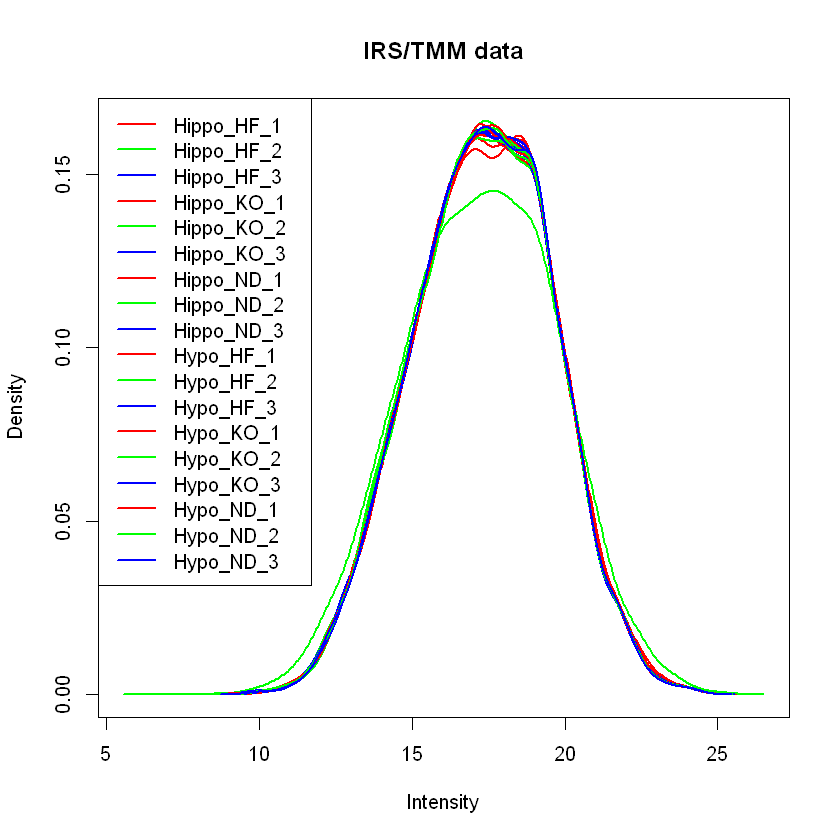

In [130]:
# see if box plots are aligned
boxplot(log2(data_irs_tmm), notch = TRUE, col = rep(c("red", "green", "blue"), each = 3), 
        main = "TMM normalization of IRS data\nExp1 (red), Exp2 (green), Exp3 (blue)",
        xlab = 'TMT Sample', ylab = 'log2 of Intensity')
# can also look at density plots (like a distribution histogram)
plotDensities(log2(data_irs_tmm), col = rep(c("red", "green", "blue"), 6), main = "IRS/TMM data")


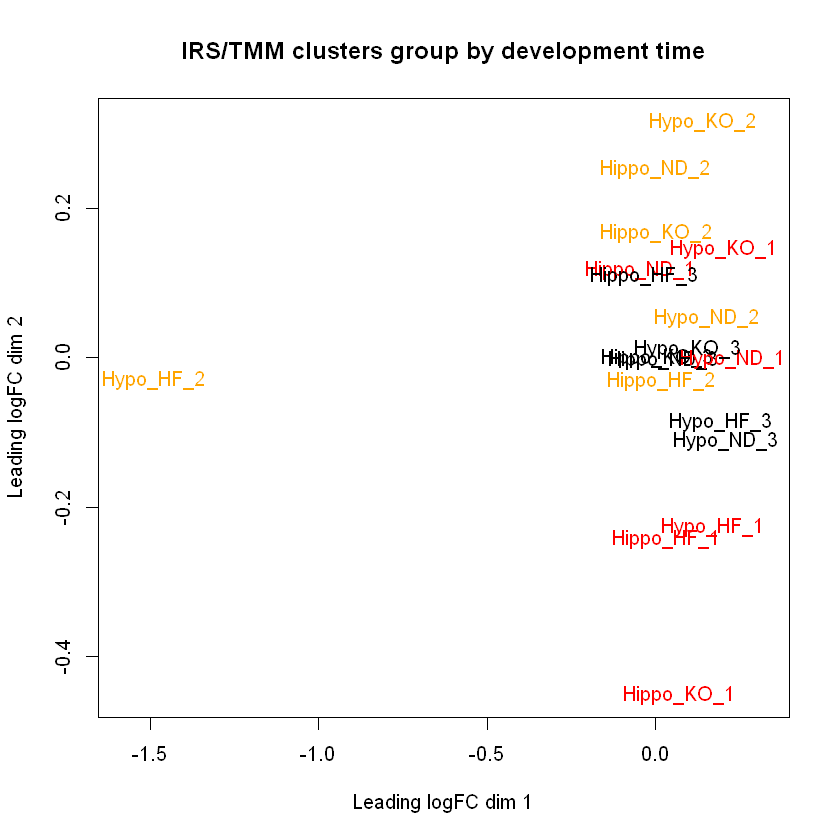

In [131]:
# see how things cluster after IRS plus TMM
col_vec <- c("red", "orange", "black")
plotMDS(log2(data_irs_tmm), col = col_vec, main = "IRS/TMM clusters group by development time")
write.table(data_irs_tmm,file = "data_irs_tmm.csv",sep = ",")

In [132]:
group <- c(rep("ND1", 3), rep("HF1", 3), rep("KO1", 3), rep("ND2", 3), rep("HF2", 3), rep("KO2", 3))
y <- DGEList(counts = data_irs, group = group, genes =accession )

Design matrix not provided. Switch to the classic mode.


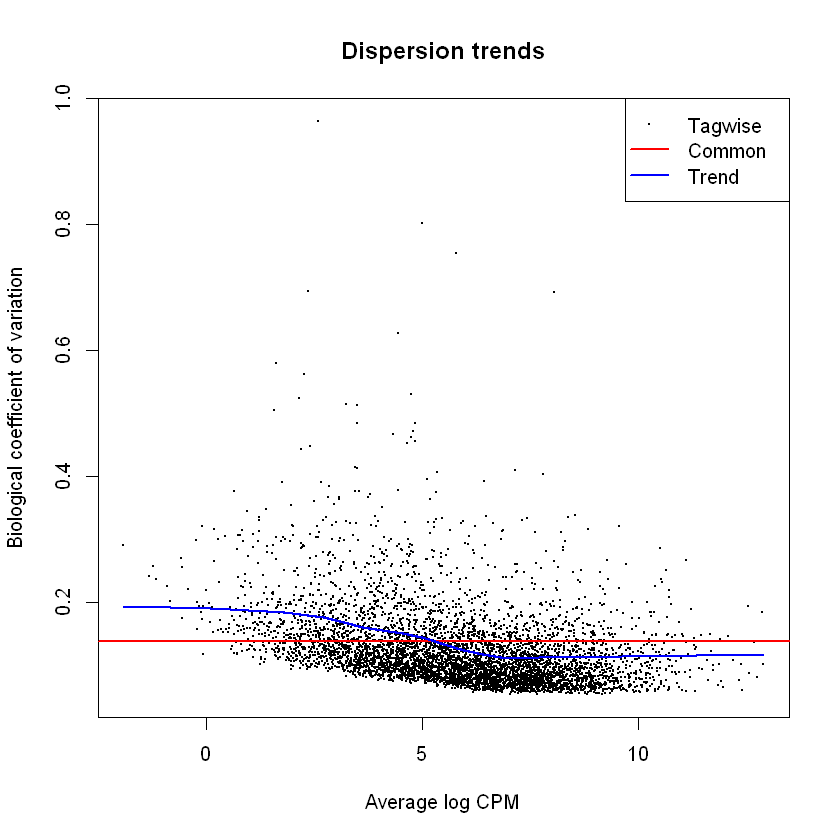

In [133]:
y <- calcNormFactors(y)
y <- estimateDisp(y)
plotBCV(y, main = "Dispersion trends")

In [134]:
#head(data_irs)

Hippo_ND_1,Hippo_ND_2,Hippo_ND_3,Hippo_HF_1,Hippo_HF_2,Hippo_HF_3,Hippo_KO_1,Hippo_KO_2,Hippo_KO_3,Hypo_ND_1,Hypo_ND_2,Hypo_ND_3,Hypo_HF_1,Hypo_HF_2,Hypo_HF_3,Hypo_KO_1,Hypo_KO_2,Hypo_KO_3
23407.61,27600.95,27960.52,24321.13,26121.83,26000.60,25705.17,24763.18,26493.76,27071.91,28025.39,26573.88,24745.59,15056.17,27434.64,26635.68,28419.60,28411.89
854017.19,897430.78,858674.59,793012.71,855855.24,858792.87,793063.96,928310.00,873925.37,882049.85,904924.74,844569.63,778016.11,658238.05,841748.66,948243.03,937322.53,917970.10
613386.66,646129.15,610221.69,531427.99,607333.88,584235.90,510465.55,650703.97,591830.41,603269.06,653186.09,601962.87,548277.95,317553.38,610251.70,664887.41,693763.97,652582.77
624447.57,655826.45,596589.48,548363.20,584224.05,576443.10,502824.41,664317.05,601216.79,592338.05,625293.99,563353.91,549916.75,566068.83,591580.47,617560.95,636385.32,611753.83
167108.75,166427.88,185497.22,196458.46,174902.14,181696.76,208573.18,182816.80,197153.68,182465.77,184924.82,183372.83,197630.47,152540.91,187993.70,190075.83,190849.49,190781.05
47996.91,50359.17,50224.53,45837.52,51456.81,51509.92,44953.31,50533.11,57624.47,51639.40,52425.98,55194.41,47583.53,27652.37,51484.48,58350.04,55036.77,51128.77


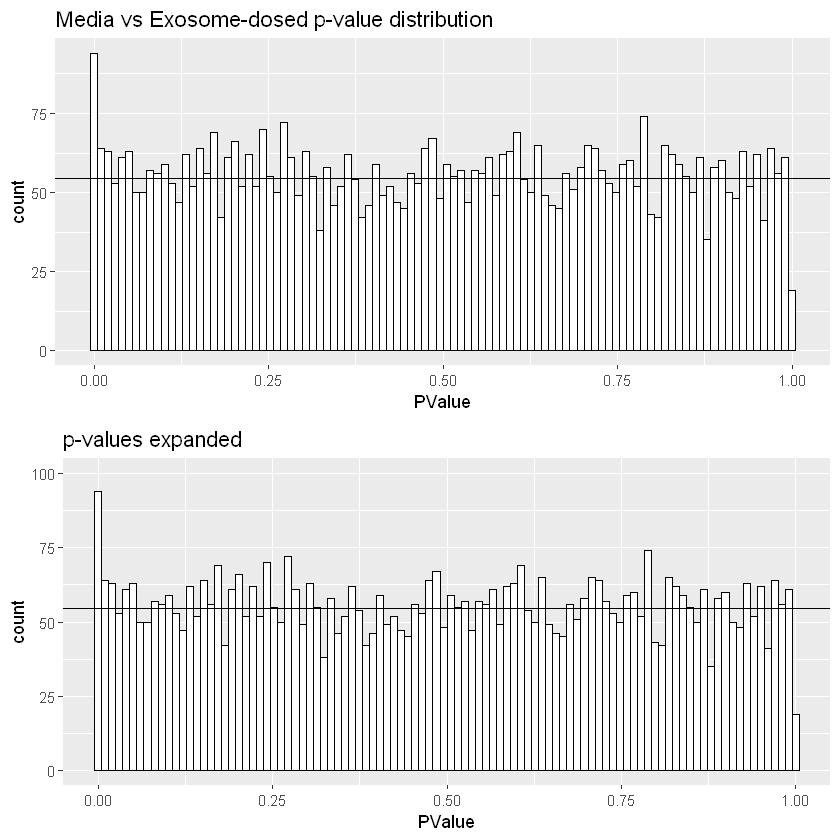

In [137]:
# compute the exact test models, p-values, FC, etc.
et <- exactTest(y, pair = c("ND1",  "KO1"))
# make the results table 
M <- 1:3
E <- 7:9
tt <- topTags(et, n = Inf, sort.by = "none")$table
ND_KO_1 <- collect_results(data_irs_tmm, tt, M, "ND1", E, "KO1")
# check the p-value distrubution
pvalue_plots(ND_KO_1, 100, "Media vs Exosome-dosed")

In [138]:
# see how many up and down candidates (10% FDR)
summary(decideTests(et, p.value = 0.10))
# see which proteins have the smallest p-values
topTags(et)$table

       KO1-ND1
Down        16
NotSig    5525
Up          29

,genes,logFC,logCPM,PValue,FDR
4975,E41L1_MOUSE,2.8861176,6.132281,9.125281e-177,5.082781e-173
458,SPA3K_MOUSE,2.1896387,5.481695,2.022112e-22,5.631582e-19
970,BACE1_MOUSE,-0.8072994,4.630825,4.738939e-18,8.798629e-15
5223,D3YXM0_MOUSE,2.1719662,3.434790,1.157516e-11,1.611841e-08
5153,A2AF31_MOUSE,1.8931932,5.131727,7.124863e-09,7.937097e-06
1226,NCHL1_MOUSE,0.4469170,8.329833,1.234908e-08,1.146406e-05
529,7B2_MOUSE,1.1056751,6.461910,1.781756e-07,1.417769e-04
2431,THNS2_MOUSE,-0.5928849,5.030766,1.469569e-06,1.004286e-03
1488,NLRX1_MOUSE,-0.5182931,5.933337,1.622724e-06,1.004286e-03
2950,CNST_MOUSE,0.6752269,3.620956,2.139196e-06,1.191532e-03


       ND2-ND1
Down         0
NotSig    5570
Up           0

,genes,logFC,logCPM,PValue,FDR
895,FABP7_MOUSE,0.3432433,6.4836130,0.004857775,1
5223,D3YXM0_MOUSE,-0.8664477,3.4347896,0.005063019,1
516,KCC2A_MOUSE,-2.3608555,8.0717140,0.006888628,1
957,CDD_MOUSE,0.3401354,3.0178073,0.008371769,1
1004,RAB2B_MOUSE,-0.2212801,4.8292992,0.013970805,1
1612,IQGA2_MOUSE,-0.4274400,5.4261530,0.021310898,1
4817,CAD13_MOUSE,0.2842244,7.7902440,0.025935946,1
777,TRAF2_MOUSE,-0.5147262,0.0711677,0.028173774,1
3231,IP3KA_MOUSE,-0.2078033,6.7876925,0.028406922,1
421,LAMB1_MOUSE,0.2483079,4.6800162,0.029295309,1


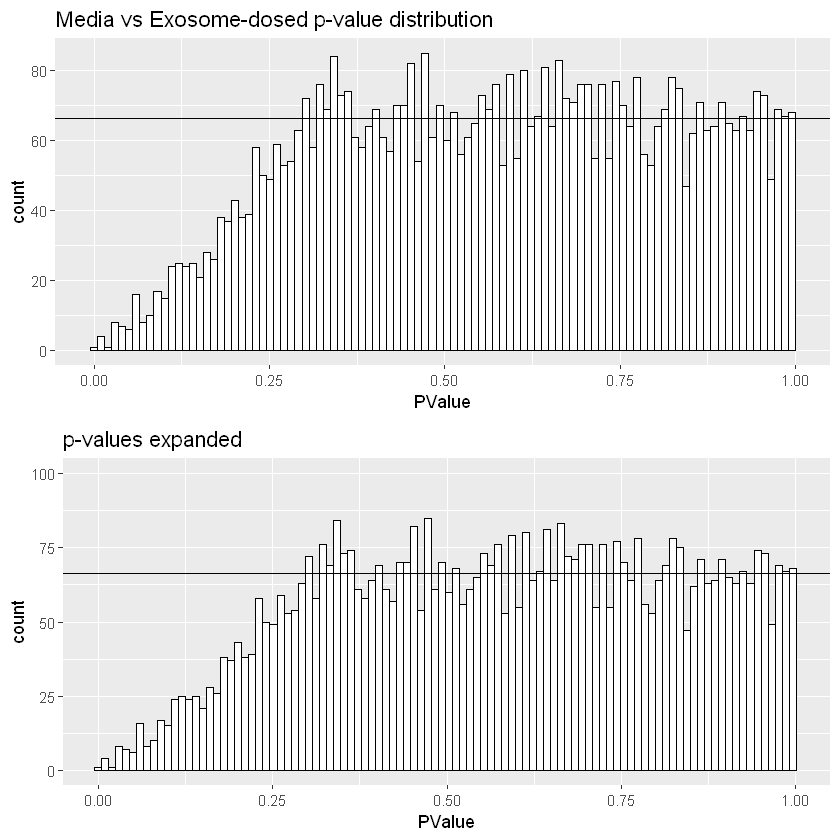

In [139]:
# compute the exact test models, p-values, FC, etc.
et <- exactTest(y, pair = c("ND1",  "ND2"))
# make the results table 
M <- 1:3
E <- 10:12
tt <- topTags(et, n = Inf, sort.by = "none")$table
ND1_ND2 <- collect_results(data_irs_tmm, tt, M, "ND1", E, "ND2")
# check the p-value distrubution
pvalue_plots(ND1_ND2, 100, "Media vs Exosome-dosed")
# see how many up and down candidates (10% FDR)
summary(decideTests(et, p.value = 0.10))
# see which proteins have the smallest p-values
topTags(et)$table

       KO2-KO1
Down         0
NotSig    5570
Up           0

,genes,logFC,logCPM,PValue,FDR
4815,AKA12_MOUSE,-0.4285652,8.494302,0.001129682,0.9980541
153,AKAP1_MOUSE,-0.5297874,4.573237,0.002042925,0.9980541
1107,A0A0N4SVK3_MOUSE,-0.4831772,2.653822,0.003542219,0.9980541
957,CDD_MOUSE,-0.3708993,3.017807,0.004043280,0.9980541
2668,UBP54_MOUSE,0.3225023,2.413856,0.004747469,0.9980541
2950,CNST_MOUSE,-0.3882050,3.620956,0.006267091,0.9980541
700,MRP_MOUSE,-0.6576914,6.312472,0.007689705,0.9980541
735,RANG_MOUSE,-0.4415134,6.939150,0.008071768,0.9980541
971,MCH_MOUSE,-0.5002454,5.374352,0.009621477,0.9980541
696,CELF1_MOUSE,0.2678073,6.274198,0.010545262,0.9980541


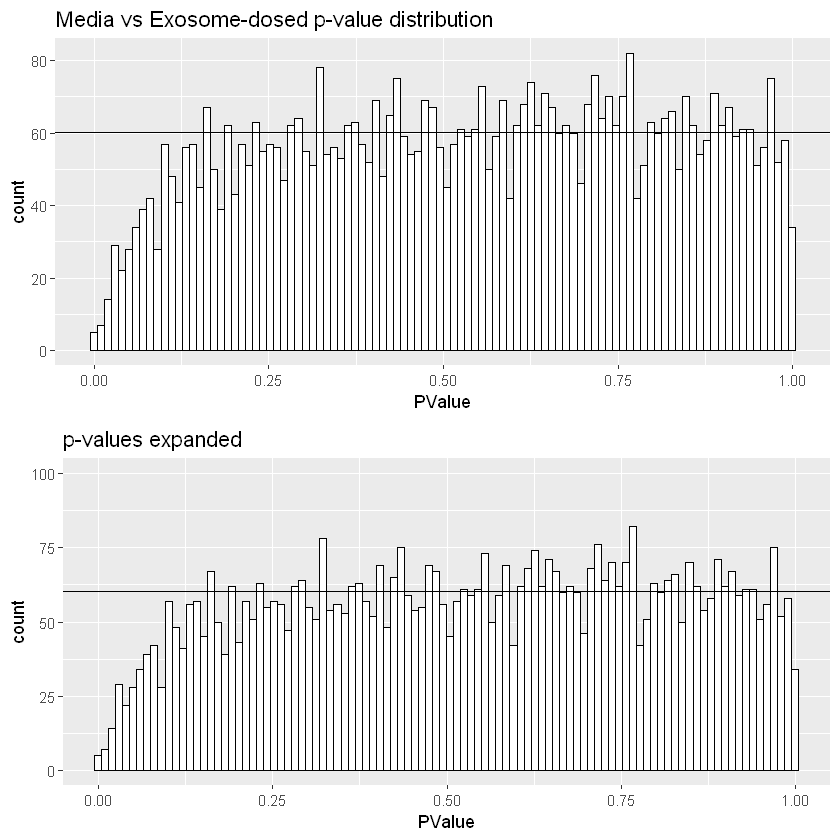

In [140]:
# compute the exact test models, p-values, FC, etc.
et <- exactTest(y, pair = c("KO1",  "KO2"))
# make the results table 
M <- 1:3
E <- 10:12
tt <- topTags(et, n = Inf, sort.by = "none")$table
KO1_KO2 <- collect_results(data_irs_tmm, tt, M, "KO1", E, "KO2")
# check the p-value distrubution
pvalue_plots(KO1_KO2, 100, "Media vs Exosome-dosed")
# see how many up and down candidates (10% FDR)
summary(decideTests(et, p.value = 0.10))
# see which proteins have the smallest p-values
topTags(et)$table

       KO2-ND2
Down        12
NotSig    5541
Up          17

,genes,logFC,logCPM,PValue,FDR
4975,E41L1_MOUSE,2.8883344,6.132281,5.297185e-177,2.950532e-173
970,BACE1_MOUSE,-1.0083354,4.630825,4.358513e-27,1.213846e-23
5223,D3YXM0_MOUSE,3.2197422,3.434790,5.405198e-22,1.003565e-18
458,SPA3K_MOUSE,1.8271001,5.481695,1.889459e-16,2.631071e-13
1226,NCHL1_MOUSE,0.6145146,8.329833,5.420438e-15,6.038367e-12
416,IGKC_MOUSE,-1.4524641,6.102694,1.924018e-09,1.557611e-06
2431,THNS2_MOUSE,-0.7403245,5.030766,1.957501e-09,1.557611e-06
2729,F177A_MOUSE,-1.0309358,6.300767,1.252655e-08,8.721611e-06
5407,G3X8T9_MOUSE,0.6731534,4.263823,3.979375e-08,2.462791e-05
403,RBM3_MOUSE,-0.7523923,5.780726,1.139203e-07,6.345361e-05


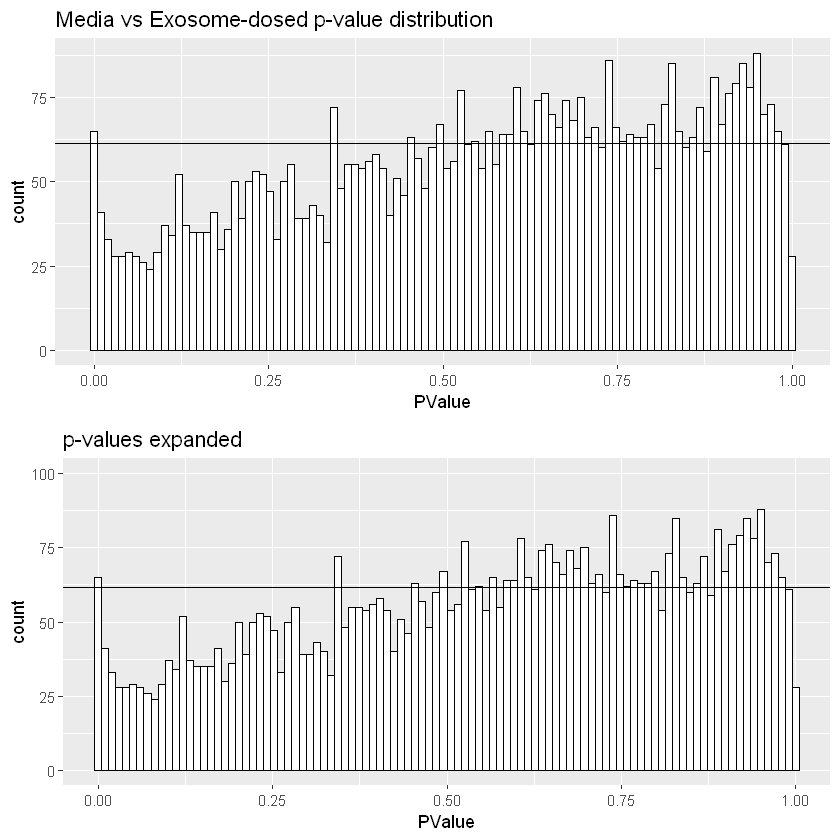

In [141]:
# compute the exact test models, p-values, FC, etc.
et <- exactTest(y, pair = c("ND2",  "KO2"))
# make the results table 
M <- 10:12
E <- 16:18
tt <- topTags(et, n = Inf, sort.by = "none")$table
ND2_KO2 <- collect_results(data_irs_tmm, tt, M, "ND2", E, "KO2")
# check the p-value distrubution
pvalue_plots(ND2_KO2, 100, "Media vs Exosome-dosed")
# see how many up and down candidates (10% FDR)
summary(decideTests(et, p.value = 0.10))
# see which proteins have the smallest p-values
topTags(et)$table

In [2]:
MQ_tmt <- read_tsv("data_irs2a.txt")
accession <- MQ_tmt$'Hippo_Protein IDs'
MQ_tmt = within(MQ_tmt, rm('Hippo_Protein IDs'))
head(MQ_tmt)
group <- c(rep("N1", 11),  rep("KO", 6))
y <- DGEList(counts = MQ_tmt, group = group, genes = accession)


Parsed with column specification:
cols(
  Hippo_ND_1 = col_double(),
  Hippo_ND_2 = col_double(),
  Hippo_ND_3 = col_double(),
  Hippo_HF_1 = col_double(),
  Hippo_HF_2 = col_double(),
  Hippo_HF_3 = col_double(),
  Hypo_ND_1 = col_double(),
  Hypo_ND_2 = col_double(),
  Hypo_ND_3 = col_double(),
  Hypo_HF_1 = col_double(),
  Hypo_HF_3 = col_double(),
  Hypo_KO_1 = col_double(),
  Hypo_KO_2 = col_double(),
  Hypo_KO_3 = col_double(),
  Hippo_KO_1 = col_double(),
  Hippo_KO_2 = col_double(),
  Hippo_KO_3 = col_double(),
  `Hippo_Protein IDs` = col_character()
)


Hippo_ND_1,Hippo_ND_2,Hippo_ND_3,Hippo_HF_1,Hippo_HF_2,Hippo_HF_3,Hypo_ND_1,Hypo_ND_2,Hypo_ND_3,Hypo_HF_1,Hypo_HF_3,Hypo_KO_1,Hypo_KO_2,Hypo_KO_3,Hippo_KO_1,Hippo_KO_2,Hippo_KO_3
22750.45,26826.07,27175.53,23638.32,25388.47,25270.65,28134.81,29125.72,27617.22,25717.15,28511.78,27681.45,29535.4,29527.39,24983.50,24067.96,25749.96
820871.73,862600.38,825348.37,762234.91,822638.44,825462.06,926920.21,950958.75,887533.35,817594.22,884568.88,996480.67,985004.6,964667.75,762284.17,892281.14,840007.25
597881.40,629796.22,594796.44,517994.49,591981.63,569467.53,625155.76,676883.79,623802.19,568169.57,632391.74,689009.64,718933.8,676258.59,497561.95,634255.40,576870.05
593486.59,623309.66,567009.74,521174.59,555257.40,547862.25,629524.46,664549.35,598720.73,584439.99,628719.32,656330.83,676337.0,650159.14,477893.67,631379.28,571407.62
160049.85,159397.74,177661.57,188159.78,167514.04,174021.64,192434.63,195028.03,193391.25,208427.84,198264.58,200460.46,201276.4,201204.21,199762.77,175094.37,188825.64
46734.39,49034.52,48903.42,44631.81,50103.29,50155.00,53569.27,54385.24,57257.14,49361.82,53408.56,60530.70,57093.6,53039.55,43770.85,49203.89,56108.72


Design matrix not provided. Switch to the classic mode.


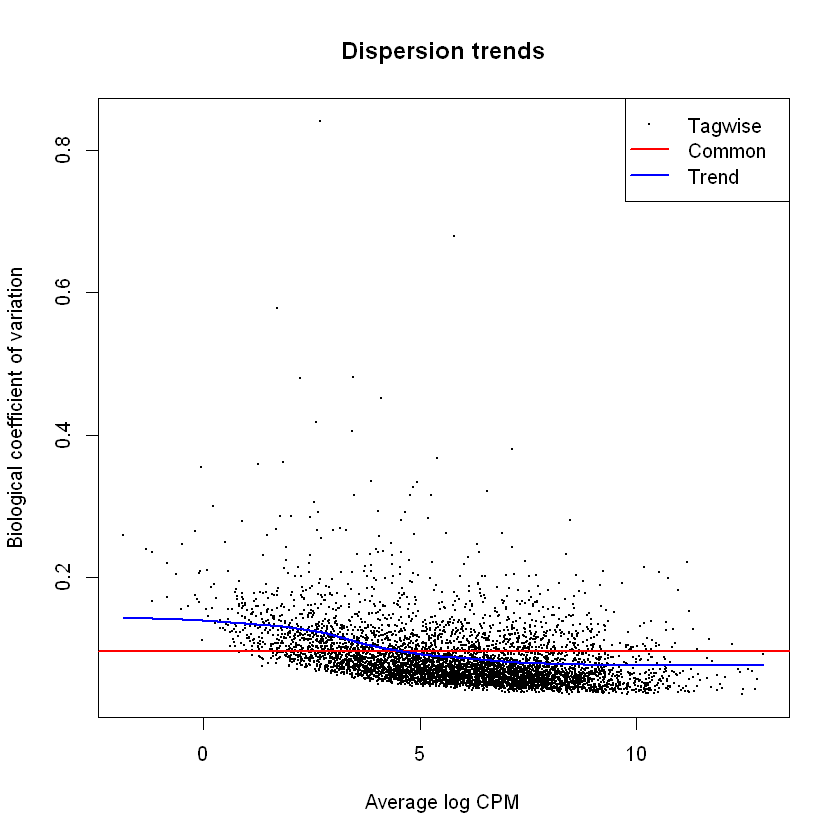

In [3]:
y <- calcNormFactors(y)
y <- estimateDisp(y)
plotBCV(y, main = "Dispersion trends")

In [4]:
et <- exactTest(y)
topTags(et)

,genes,logFC,logCPM,PValue,FDR
4975,E41L1_MOUSE,-2.7833787,6.205524,0.000000e+00,0.000000e+00
458,SPA3K_MOUSE,-1.9433962,5.503362,1.036981e-88,2.887993e-85
970,BACE1_MOUSE,0.9570211,4.631052,6.341526e-76,1.177410e-72
5223,D3YXM0_MOUSE,-2.4640841,3.491955,6.788912e-28,9.453559e-25
2431,THNS2_MOUSE,0.6495359,5.037274,3.650129e-23,4.066243e-20
1226,NCHL1_MOUSE,-0.4656513,8.359709,3.499890e-19,3.249065e-16
2729,F177A_MOUSE,0.8008394,6.339871,4.556440e-19,3.625624e-16
5011,Q6TA13_MOUSE,-0.3949151,8.722706,1.373755e-16,8.855480e-14
3717,THTM_MOUSE,-0.4789436,7.287664,1.430868e-16,8.855480e-14
5024,A0A0A6YY53_MOUSE,0.6985001,5.883647,1.828294e-13,1.018360e-10


       KO-N1
Down      53
NotSig  5456
Up        61

,genes,logFC,logCPM,PValue,FDR
4975,E41L1_MOUSE,2.7833787,6.205524,0.000000e+00,0.000000e+00
458,SPA3K_MOUSE,1.9433962,5.503362,1.036981e-88,2.887993e-85
970,BACE1_MOUSE,-0.9570211,4.631052,6.341526e-76,1.177410e-72
5223,D3YXM0_MOUSE,2.4640841,3.491955,6.788912e-28,9.453559e-25
2431,THNS2_MOUSE,-0.6495359,5.037274,3.650129e-23,4.066243e-20
1226,NCHL1_MOUSE,0.4656513,8.359709,3.499890e-19,3.249065e-16
2729,F177A_MOUSE,-0.8008394,6.339871,4.556440e-19,3.625624e-16
5011,Q6TA13_MOUSE,0.3949151,8.722706,1.373755e-16,8.855480e-14
3717,THTM_MOUSE,0.4789436,7.287664,1.430868e-16,8.855480e-14
5024,A0A0A6YY53_MOUSE,-0.6985001,5.883647,1.828294e-13,1.018360e-10


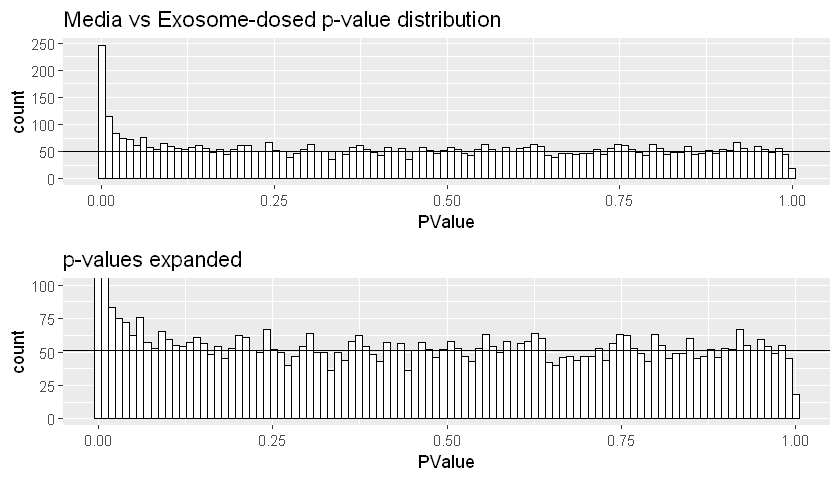

In [16]:
# compute the exact test models, p-values, FC, etc.
et <- exactTest(y, pair = c("N1",  "KO"))
# make the results table 
M <- 1:11
E <- 12:17
tt <- topTags(et, n = Inf, sort.by = "none")$table
NK <- collect_results(MQ_tmt, tt, M, "N1", E, "KO")
# check the p-value distrubution
pvalue_plots(NK, 100, "Media vs Exosome-dosed")
# see how many up and down candidates (10% FDR)
summary(decideTests(et, p.value = 0.01))
# see which proteins have the smallest p-values
topTags(et)$table

In [17]:
# see how many candidates are in each category
NK %>% count(candidate)


candidate,n
high,114
med,67
low,51
no,5338


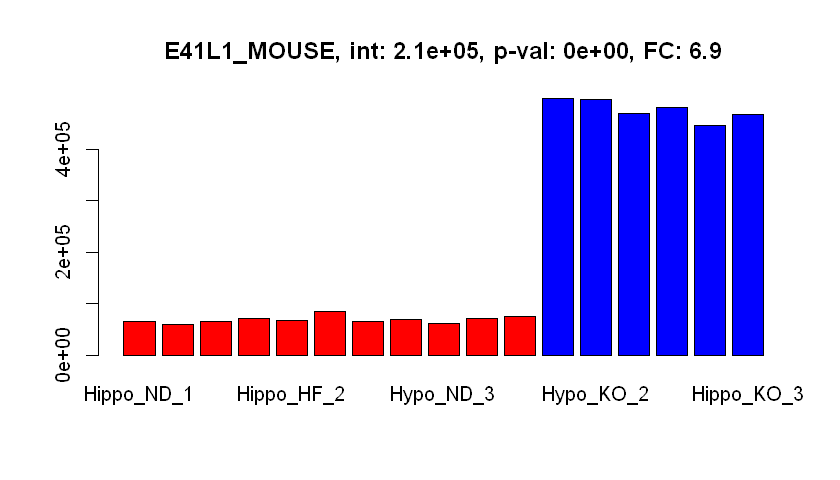

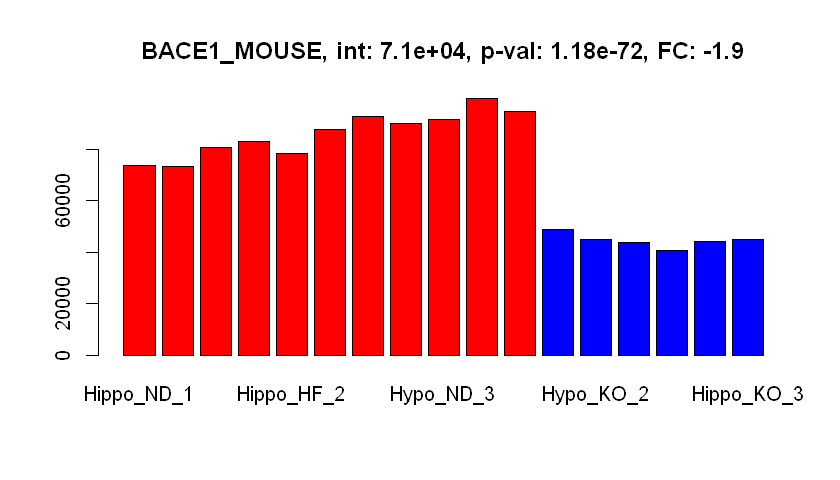

In [19]:
set_plot_dimensions(7, 4)
plot_top_tags(NK, 11, 6, 1)

In [26]:
MQ_tmt <- read_tsv("data_irs2a.txt")
accession <- MQ_tmt$'Hippo_Protein IDs'
MQ_tmt = within(MQ_tmt, rm('Hippo_Protein IDs'))
head(MQ_tmt)
group <- factor(c(1,1,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2))
design <- model.matrix(~group)
y <- DGEList(counts = MQ_tmt, group = group, genes = accession)
y <- estimateDisp(y, design)

fit <- glmQLFit(y, design)
tr <- glmTreat(fit, coef=2, lfc=1.3)
topTags(tr)

Parsed with column specification:
cols(
  Hippo_ND_1 = col_double(),
  Hippo_ND_2 = col_double(),
  Hippo_ND_3 = col_double(),
  Hippo_HF_1 = col_double(),
  Hippo_HF_2 = col_double(),
  Hippo_HF_3 = col_double(),
  Hypo_ND_1 = col_double(),
  Hypo_ND_2 = col_double(),
  Hypo_ND_3 = col_double(),
  Hypo_HF_1 = col_double(),
  Hypo_HF_3 = col_double(),
  Hypo_KO_1 = col_double(),
  Hypo_KO_2 = col_double(),
  Hypo_KO_3 = col_double(),
  Hippo_KO_1 = col_double(),
  Hippo_KO_2 = col_double(),
  Hippo_KO_3 = col_double(),
  `Hippo_Protein IDs` = col_character()
)


Hippo_ND_1,Hippo_ND_2,Hippo_ND_3,Hippo_HF_1,Hippo_HF_2,Hippo_HF_3,Hypo_ND_1,Hypo_ND_2,Hypo_ND_3,Hypo_HF_1,Hypo_HF_3,Hypo_KO_1,Hypo_KO_2,Hypo_KO_3,Hippo_KO_1,Hippo_KO_2,Hippo_KO_3
22750.45,26826.07,27175.53,23638.32,25388.47,25270.65,28134.81,29125.72,27617.22,25717.15,28511.78,27681.45,29535.4,29527.39,24983.50,24067.96,25749.96
820871.73,862600.38,825348.37,762234.91,822638.44,825462.06,926920.21,950958.75,887533.35,817594.22,884568.88,996480.67,985004.6,964667.75,762284.17,892281.14,840007.25
597881.40,629796.22,594796.44,517994.49,591981.63,569467.53,625155.76,676883.79,623802.19,568169.57,632391.74,689009.64,718933.8,676258.59,497561.95,634255.40,576870.05
593486.59,623309.66,567009.74,521174.59,555257.40,547862.25,629524.46,664549.35,598720.73,584439.99,628719.32,656330.83,676337.0,650159.14,477893.67,631379.28,571407.62
160049.85,159397.74,177661.57,188159.78,167514.04,174021.64,192434.63,195028.03,193391.25,208427.84,198264.58,200460.46,201276.4,201204.21,199762.77,175094.37,188825.64
46734.39,49034.52,48903.42,44631.81,50103.29,50155.00,53569.27,54385.24,57257.14,49361.82,53408.56,60530.70,57093.6,53039.55,43770.85,49203.89,56108.72


,genes,logFC,unshrunk.logFC,logCPM,PValue,FDR
4975,E41L1_MOUSE,2.7853607,2.7853629,6.206355,1.585993e-16,8.833983e-13
458,SPA3K_MOUSE,1.9423572,1.9423593,5.501311,5.230070e-08,1.456575e-04
5223,D3YXM0_MOUSE,2.4614479,2.4614598,3.490353,3.565931e-06,6.620745e-03
152,PRDX6_MOUSE,1.8933420,1.8933436,5.788520,4.117750e-02,1.000000e+00
5153,A2AF31_MOUSE,1.4046082,1.4046099,5.186118,1.259783e-01,1.000000e+00
1872,COX7R_MOUSE,1.1622853,1.1622873,4.657688,4.594978e-01,1.000000e+00
3298,IGSF8_MOUSE,1.0082632,1.0082764,1.688526,4.771254e-01,1.000000e+00
3057,ANM5_MOUSE,0.8053787,0.8053839,2.681872,5.223252e-01,1.000000e+00
417,IGHM_MOUSE,-1.0635851,-1.0635886,4.029647,6.268262e-01,1.000000e+00
47,A2CEK9_MOUSE,0.9342819,0.9342891,2.467311,8.123730e-01,1.000000e+00


In [30]:
tt <- topTags(tr, n = Inf, sort.by = "logFC")$table
head(tt)

,genes,logFC,unshrunk.logFC,logCPM,PValue,FDR
4975,E41L1_MOUSE,2.785361,2.785363,6.206355,1.585993e-16,8.833983e-13
5223,D3YXM0_MOUSE,2.461448,2.461460,3.490353,3.565931e-06,6.620745e-03
458,SPA3K_MOUSE,1.942357,1.942359,5.501311,5.230070e-08,1.456575e-04
152,PRDX6_MOUSE,1.893342,1.893344,5.788520,4.117750e-02,1.000000e+00
5153,A2AF31_MOUSE,1.404608,1.404610,5.186118,1.259783e-01,1.000000e+00
1872,COX7R_MOUSE,1.162285,1.162287,4.657688,4.594978e-01,1.000000e+00
